In [2]:
import pandas as pd
import scanpy as sc
import anndata as ad
import pymn
import matplotlib
import itertools
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sc.settings.verbosity = 3

In [3]:
base_file_name = "crown"
file_location = (
    "/data/passala/Collaborator_Data/Sunil_Ken_root_Collab/Project_2_across_roots"
)
counts_file = file_location + "/" + base_file_name + "_counts.csv"
counts_pd = pd.read_csv(counts_file, index_col=0)
counts_pd = counts_pd.T

corrected_file = file_location + "/" + base_file_name + "_data.csv"
corrected_pd = pd.read_csv(corrected_file, index_col=0)
corrected_pd = corrected_pd.T


meta_file = file_location + "/" + base_file_name + "_meta.csv"
meta_pd = pd.read_csv(meta_file, index_col=0)
meta_pd


,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,seurat_clusters,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.5,MeristemScore,DifferentiationScore
Crown_AAACGAAAGGTGCCTC,Crown,5896,2370,10,10,11,11,14,6.926802,161.080670
Crown_AAACGCTAGTAAGCAT,Crown,25822,6458,3,3,2,2,2,7.368507,97.184679
Crown_AAACGCTCAACAAAGT,Crown,23729,4608,13,13,14,14,13,27.596676,3.538529
Crown_AAACGCTGTCGACTTA,Crown,18810,5511,3,3,2,2,2,7.236529,55.915927
Crown_AAACGCTGTGTGTCCG,Crown,9421,3423,4,4,3,3,3,6.309957,86.873281
...,...,...,...,...,...,...,...,...,...,...
Crown_TTTGGAGCAGGAGGTT,Crown,7463,3179,5,5,4,4,4,1.700254,66.810692
Crown_TTTGGAGGTTGTGCCG,Crown,6853,2723,6,6,6,6,6,4.499211,138.761250
Crown_TTTGGAGTCCGCAGTG,Crown,18903,4865,2,2,1,1,1,7.832226,103.957703
Crown_TTTGGTTAGGACACTG,Crown,11506,4110,9,9,10,10,10,5.003707,77.402431


In [4]:
counts_anndata = ad.AnnData(X=counts_pd.values)
counts_anndata.var.index = counts_pd.columns
counts_anndata.obs = meta_pd

corrected_anndata = ad.AnnData(X=corrected_pd.values)
corrected_anndata.var.index = corrected_pd.columns
corrected_anndata.obs = meta_pd


/tmp/ipykernel_2217190/2407392780.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  counts_anndata = ad.AnnData(X=counts_pd.values)
/tmp/ipykernel_2217190/2407392780.py:5: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  corrected_anndata = ad.AnnData(X=corrected_pd.values)


In [5]:
def read_in_sunil_formated_data(
    file_name,
    file_location="/data/passala/Collaborator_Data/Sunil_Ken_root_Collab/Project_2_across_roots",
    counts=False,
):
    """Take in data from Sunil - formatted as 3 files with the same prefix

    Args:
        file_name (str): prefix of the 3 file
        file_location (str, optional): folder files are in. Defaults to '/data/passala/Collaborator_Data/Sunil_Ken_root_Collab/Project_2_across_roots'.
        counts (boolean,optional): Whether to return the raw counts or the corrected. When False returns corrected data. Defaults to False
    Raises:
        Exception: _description_
        Exception: _description_
        Exception: _description_

    Returns:
        anndata: Either the counts or the corrected anndata
    """
    base_file_name = file_name
    file_location = file_location
    counts_file = file_location + "/" + base_file_name + "_counts.csv"
    counts_pd = pd.read_csv(counts_file, index_col=0)
    counts_pd = counts_pd.T

    corrected_file = file_location + "/" + base_file_name + "_data.csv"
    corrected_pd = pd.read_csv(corrected_file, index_col=0)
    corrected_pd = corrected_pd.T

    meta_file = file_location + "/" + base_file_name + "_meta.csv"
    meta_pd = pd.read_csv(meta_file, index_col=0)

    if all(meta_pd.index == counts_pd.index) == False:
        raise Exception("Meta data doesn't match counts index")
    if all(meta_pd.index == corrected_pd.index) == False:
        raise Exception("Meta data doesn't match corrected index")
    if all(counts_pd.index == corrected_pd.index) == False:
        raise Exception("Counts doesn't match corrected data")

    counts_anndata = ad.AnnData(X=counts_pd.values)
    counts_anndata.var.index = counts_pd.columns
    counts_anndata.obs = meta_pd

    corrected_anndata = ad.AnnData(X=corrected_pd.values)
    corrected_anndata.var.index = corrected_pd.columns
    corrected_anndata.obs = meta_pd

    if counts == False:
        return corrected_anndata
    if counts:
        return counts_anndata


In [6]:
primary_data = read_in_sunil_formated_data("primary")
crown_data = read_in_sunil_formated_data("crown")
prim_lat_data = read_in_sunil_formated_data("primary_lat")
seminal_data = read_in_sunil_formated_data("seminal")
sem_lat_data = read_in_sunil_formated_data("seminal_lat")


/tmp/ipykernel_2217190/3874807018.py:40: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  counts_anndata = ad.AnnData(X=counts_pd.values)
/tmp/ipykernel_2217190/3874807018.py:44: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  corrected_anndata = ad.AnnData(X=corrected_pd.values)
/tmp/ipykernel_2217190/3874807018.py:40: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  counts_anndata = ad.AnnDat

In [7]:
primary_data

AnnData object with n_obs × n_vars = 4790 × 25712
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.5', 'seurat_clusters', 'MeristemScore', 'DifferentiationScore'

In [8]:
crown_data

AnnData object with n_obs × n_vars = 2304 × 24573
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.8', 'seurat_clusters', 'RNA_snn_res.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.5', 'MeristemScore', 'DifferentiationScore'

In [9]:
merged_test = ad.concat([primary_data, crown_data], join="outer")


In [10]:
merged_test

AnnData object with n_obs × n_vars = 7094 × 26133
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.5', 'seurat_clusters', 'MeristemScore', 'DifferentiationScore', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.5'

In [11]:
crown_data.var

""
Zm00001eb026490
Zm00001eb056070
Zm00001eb055450
Zm00001eb053570
Zm00001eb004770
...
Zm00001eb442310
Zm00001eb442340
Zm00001eb442700
Zm00001eb442750


In [12]:
merged_test.obs

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.5,seurat_clusters,MeristemScore,DifferentiationScore,RNA_snn_res.0.8,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.5
Primary_AAACCCAAGACTAAGT,Primary,3958,1882,14.0,14,10.971583,102.741963,NaN,NaN,NaN,NaN
Primary_AAACCCAAGTGGCCTC,Primary,2270,1362,4.0,4,5.062132,111.039356,NaN,NaN,NaN,NaN
Primary_AAACCCACAAGGTCAG,Primary,6302,2227,14.0,14,6.885608,93.290683,NaN,NaN,NaN,NaN
Primary_AAACCCACACGAAGAC,Primary,4962,1920,0.0,0,16.052271,33.287019,NaN,NaN,NaN,NaN
Primary_AAACCCATCAATCTCT,Primary,3163,1680,13.0,13,45.456636,8.259737,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Crown_TTTGGAGCAGGAGGTT,Crown,7463,3179,NaN,5,1.700254,66.810692,5.0,4.0,4.0,4.0
Crown_TTTGGAGGTTGTGCCG,Crown,6853,2723,NaN,6,4.499211,138.761250,6.0,6.0,6.0,6.0
Crown_TTTGGAGTCCGCAGTG,Crown,18903,4865,NaN,2,7.832226,103.957703,2.0,1.0,1.0,1.0
Crown_TTTGGTTAGGACACTG,Crown,11506,4110,NaN,9,5.003707,77.402431,9.0,10.0,10.0,10.0


/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


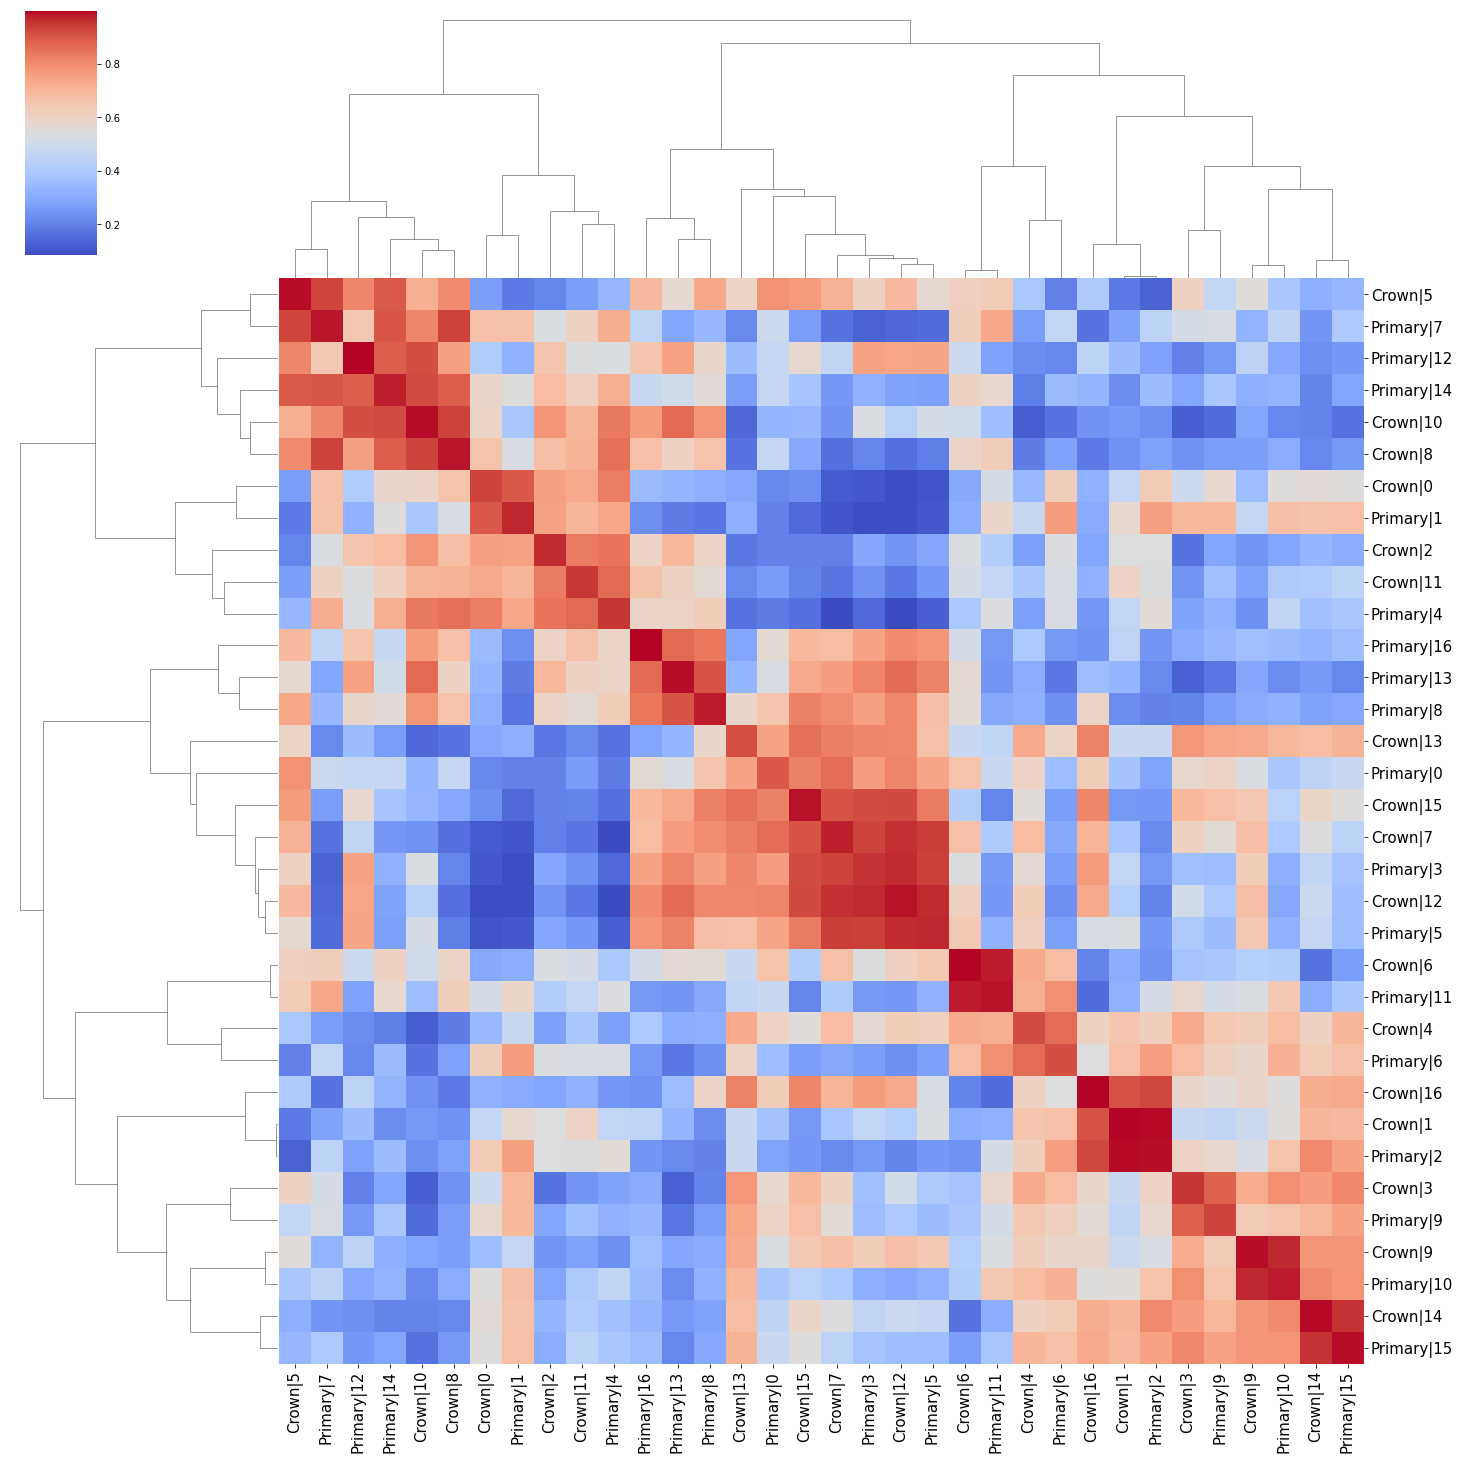

In [13]:
pymn.variableGenes(merged_test, study_col='orig.ident')
pymn.MetaNeighborUS(merged_test, study_col='orig.ident',
                    ct_col='seurat_clusters', fast_version=True)
g = pymn.plotMetaNeighborUS(merged_test, figsize=(
    20, 20), fontsize=15, show=False, cmap='coolwarm', cbar_pos=(0.02, 0.82, 0.05, 0.17))
# g.savefig('/data/passala/Plots_for_projects/Bruno_Ken_cross_species_single_cell/updated_metaneighbor_with_post_revision_data.svg')

In [14]:
full_merge = ad.concat([primary_data, crown_data, sem_lat_data,
                       seminal_data, prim_lat_data], join='outer')

In [15]:
full_merge


AnnData object with n_obs × n_vars = 24153 × 27814
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.5', 'seurat_clusters', 'MeristemScore', 'DifferentiationScore', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.5'

In [16]:
sc.pp.filter_genes(full_merge, min_cells=5)

filtered out 816 genes that are detected in less than 5 cells


In [17]:
full_merge


AnnData object with n_obs × n_vars = 24153 × 26998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.5', 'seurat_clusters', 'MeristemScore', 'DifferentiationScore', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.5'
    var: 'n_cells'

In [18]:
sc.pp.calculate_qc_metrics(
    full_merge, percent_top=None, log1p=False, inplace=True)

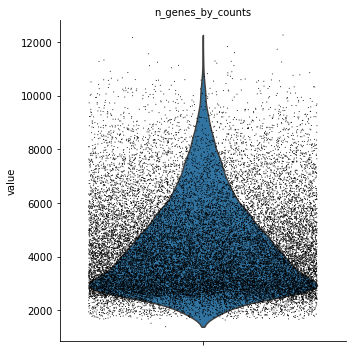

In [19]:
sc.pl.violin(full_merge, ["n_genes_by_counts"], jitter=0.4, multi_panel=True)


In [20]:
#full_merge = full_merge[full_merge.obs.n_genes_by_counts < 5000, :]


In [21]:
full_merge = full_merge.copy()


In [22]:
full_merge.obs["orig.ident"] = full_merge.obs["orig.ident"].astype(str)


/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


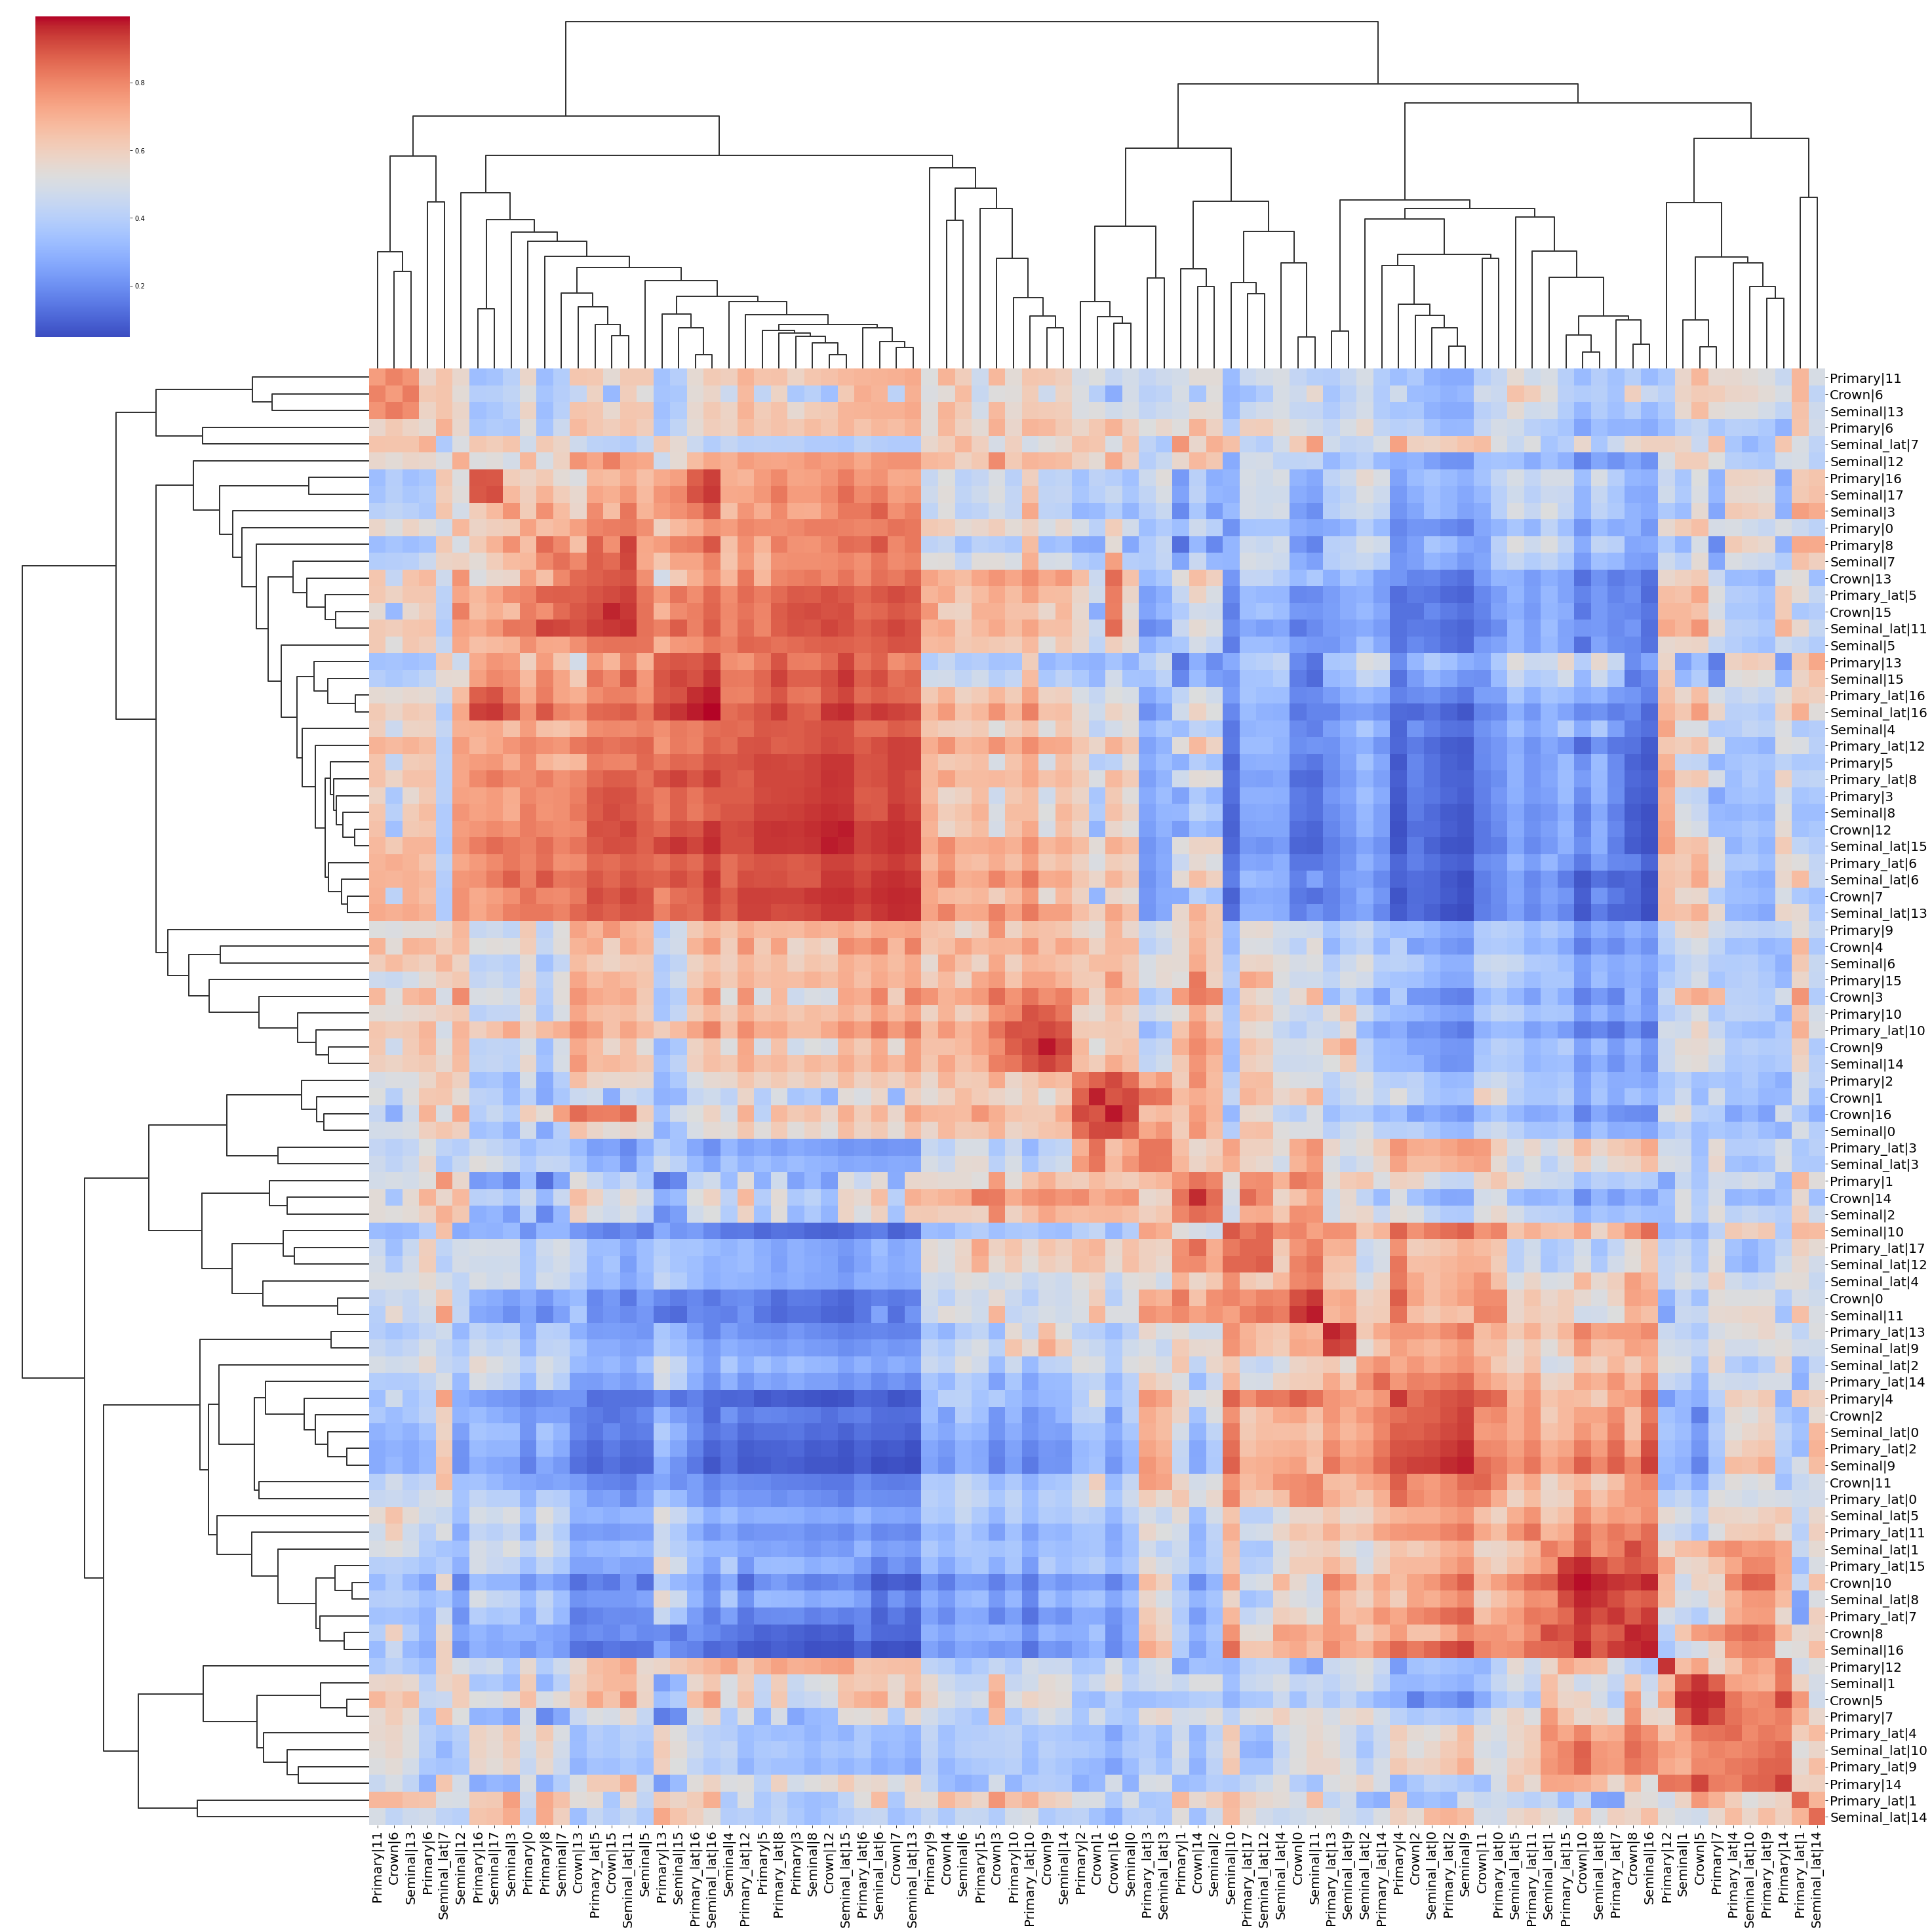

In [23]:
pymn.variableGenes(full_merge, study_col='orig.ident')
pymn.MetaNeighborUS(full_merge, study_col='orig.ident',
                    ct_col='seurat_clusters', fast_version=False, node_degree_normalization= True)
g = pymn.plotMetaNeighborUS(full_merge, cmap='coolwarm', figsize=(
    40, 40), fontsize=20, show=False, cbar_pos=(0.02, 0.82, 0.05, 0.17))

for a in g.ax_row_dendrogram.collections:
    a.set_linewidth(2)

for a in g.ax_col_dendrogram.collections:
    a.set_linewidth(2)

In [24]:
#g.savefig('/data/passala/Plots_for_projects/Sunil_Ken_root_shoot/project_2_all_corrected_data_metaneighbor_full.pdf')

In [25]:
all_combos_of_sc_data = itertools.combinations([primary_data, crown_data, sem_lat_data,
                       seminal_data, prim_lat_data],2)


In [26]:
all_combos_of_sc_data = list(all_combos_of_sc_data)

In [27]:
all_combos_of_sc_data[0][0].obs['orig.ident'][0]

'Primary'

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=

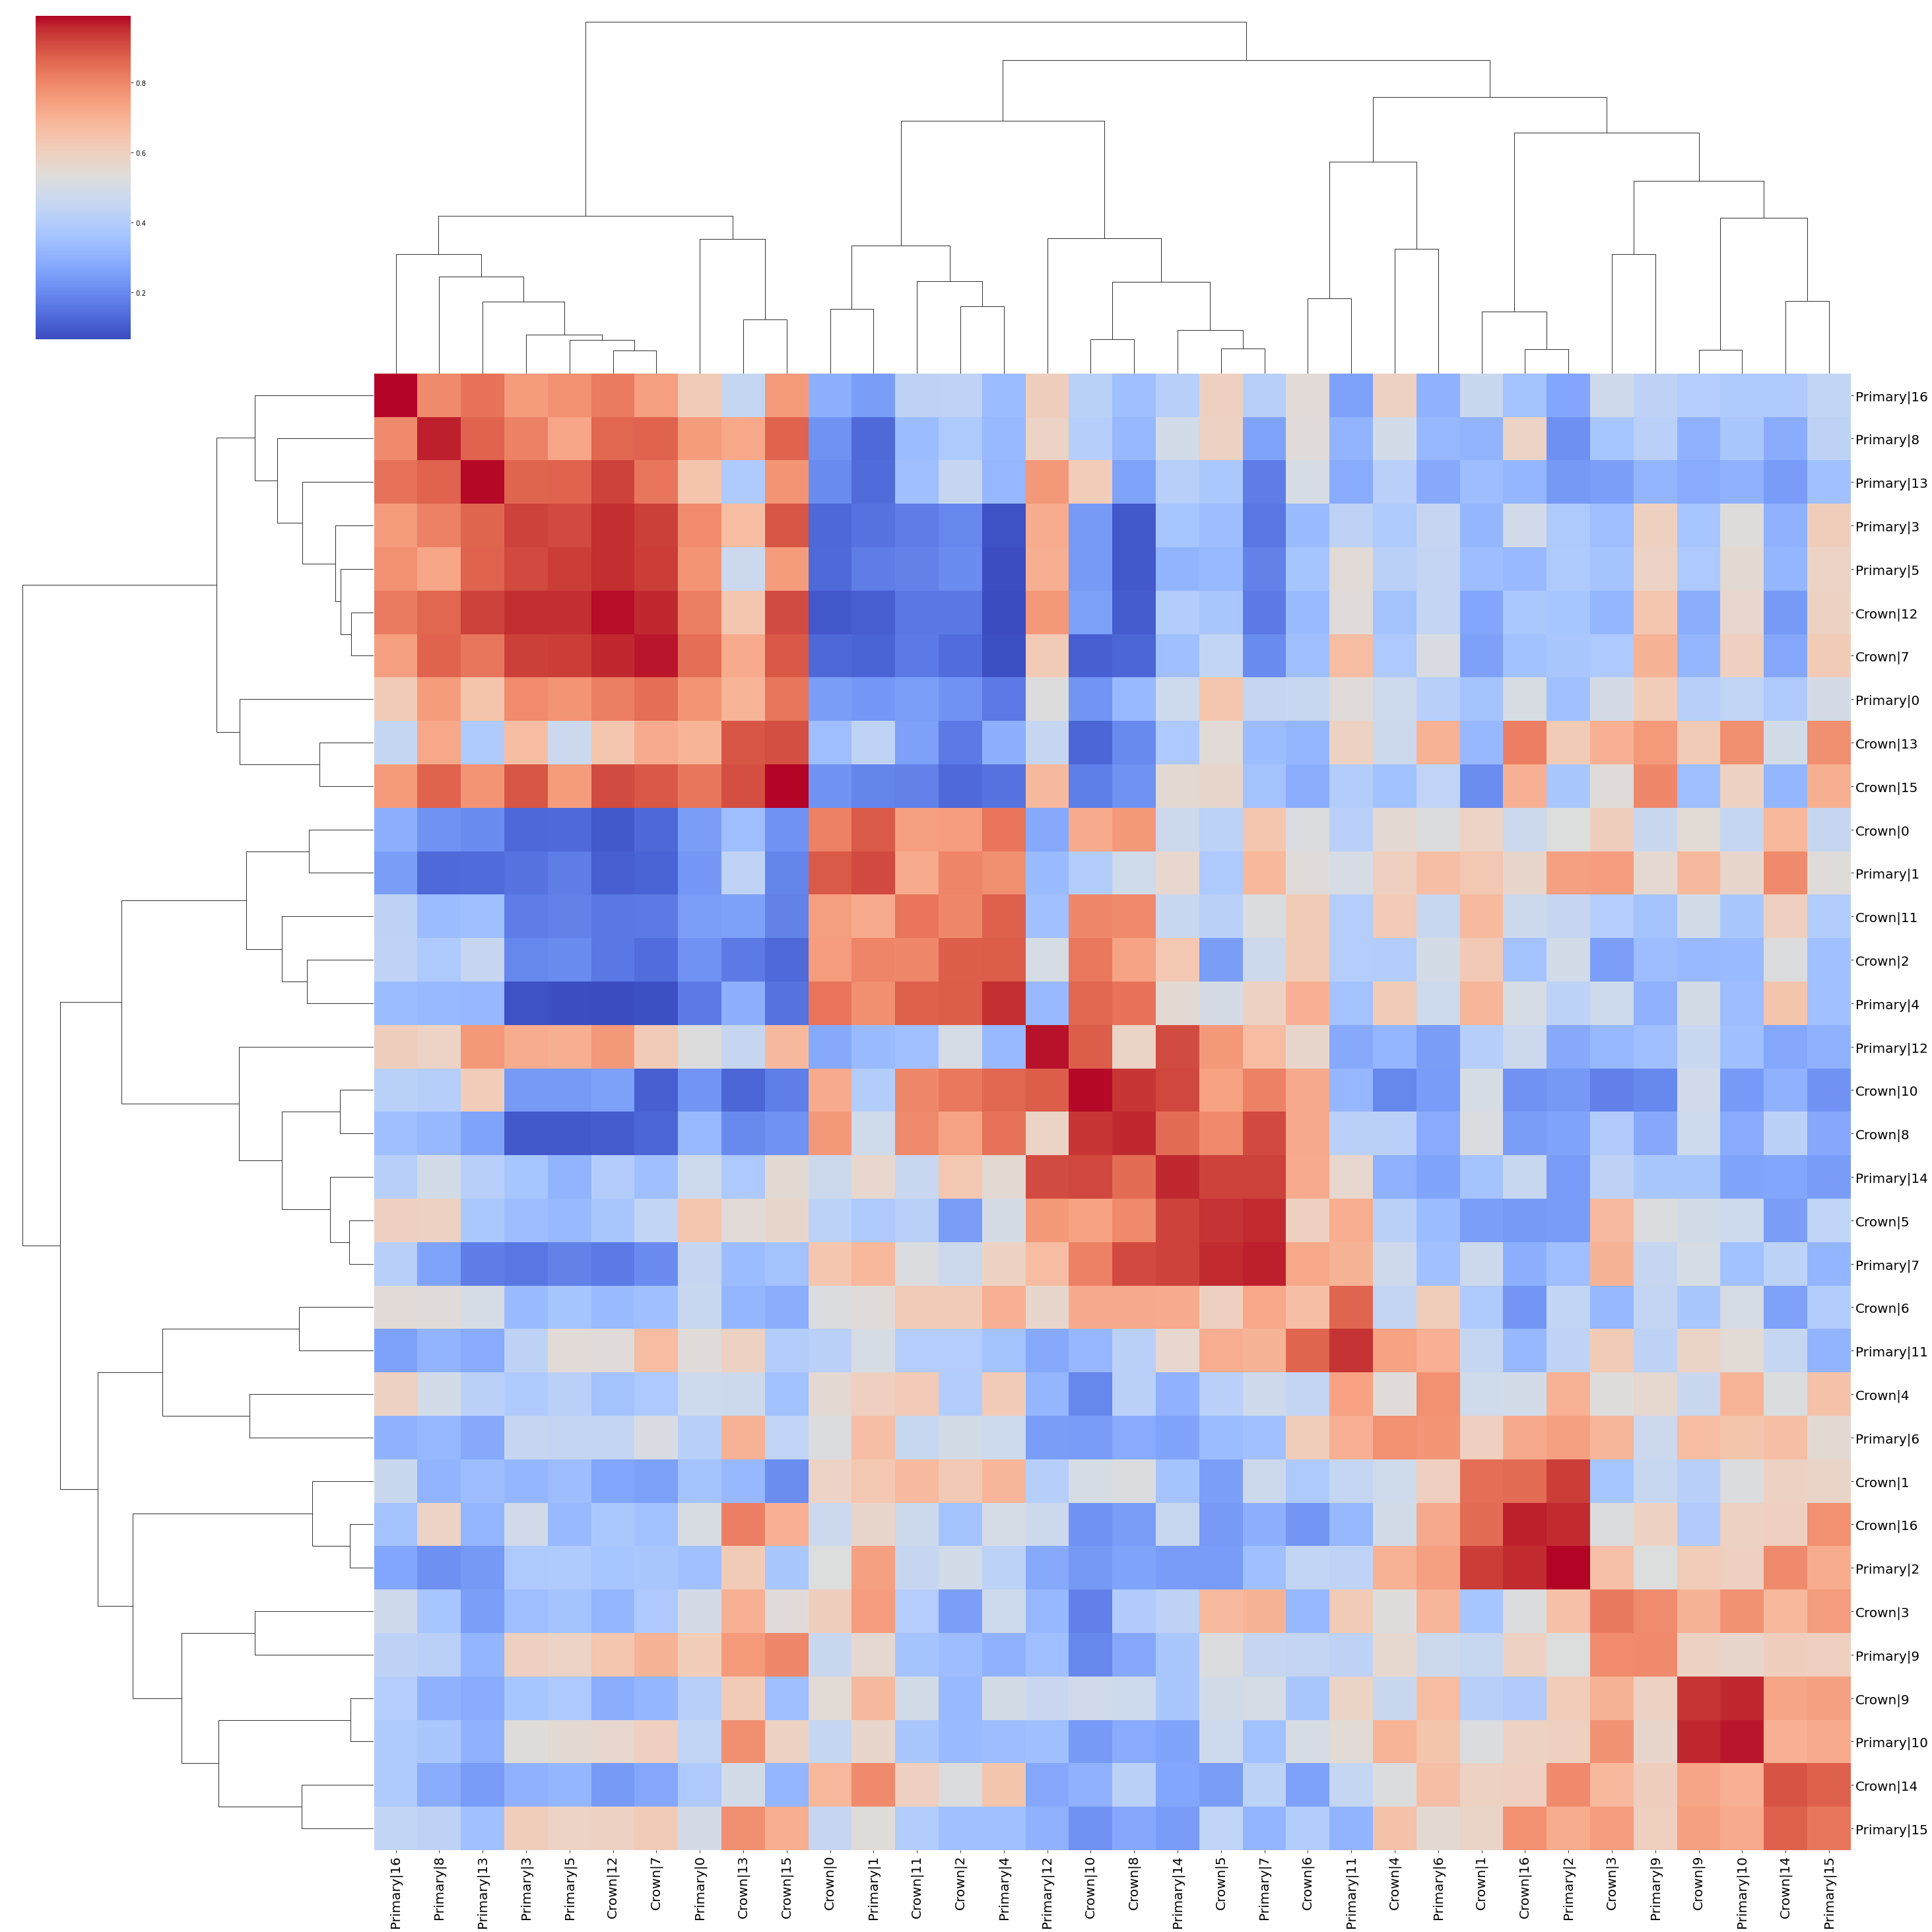

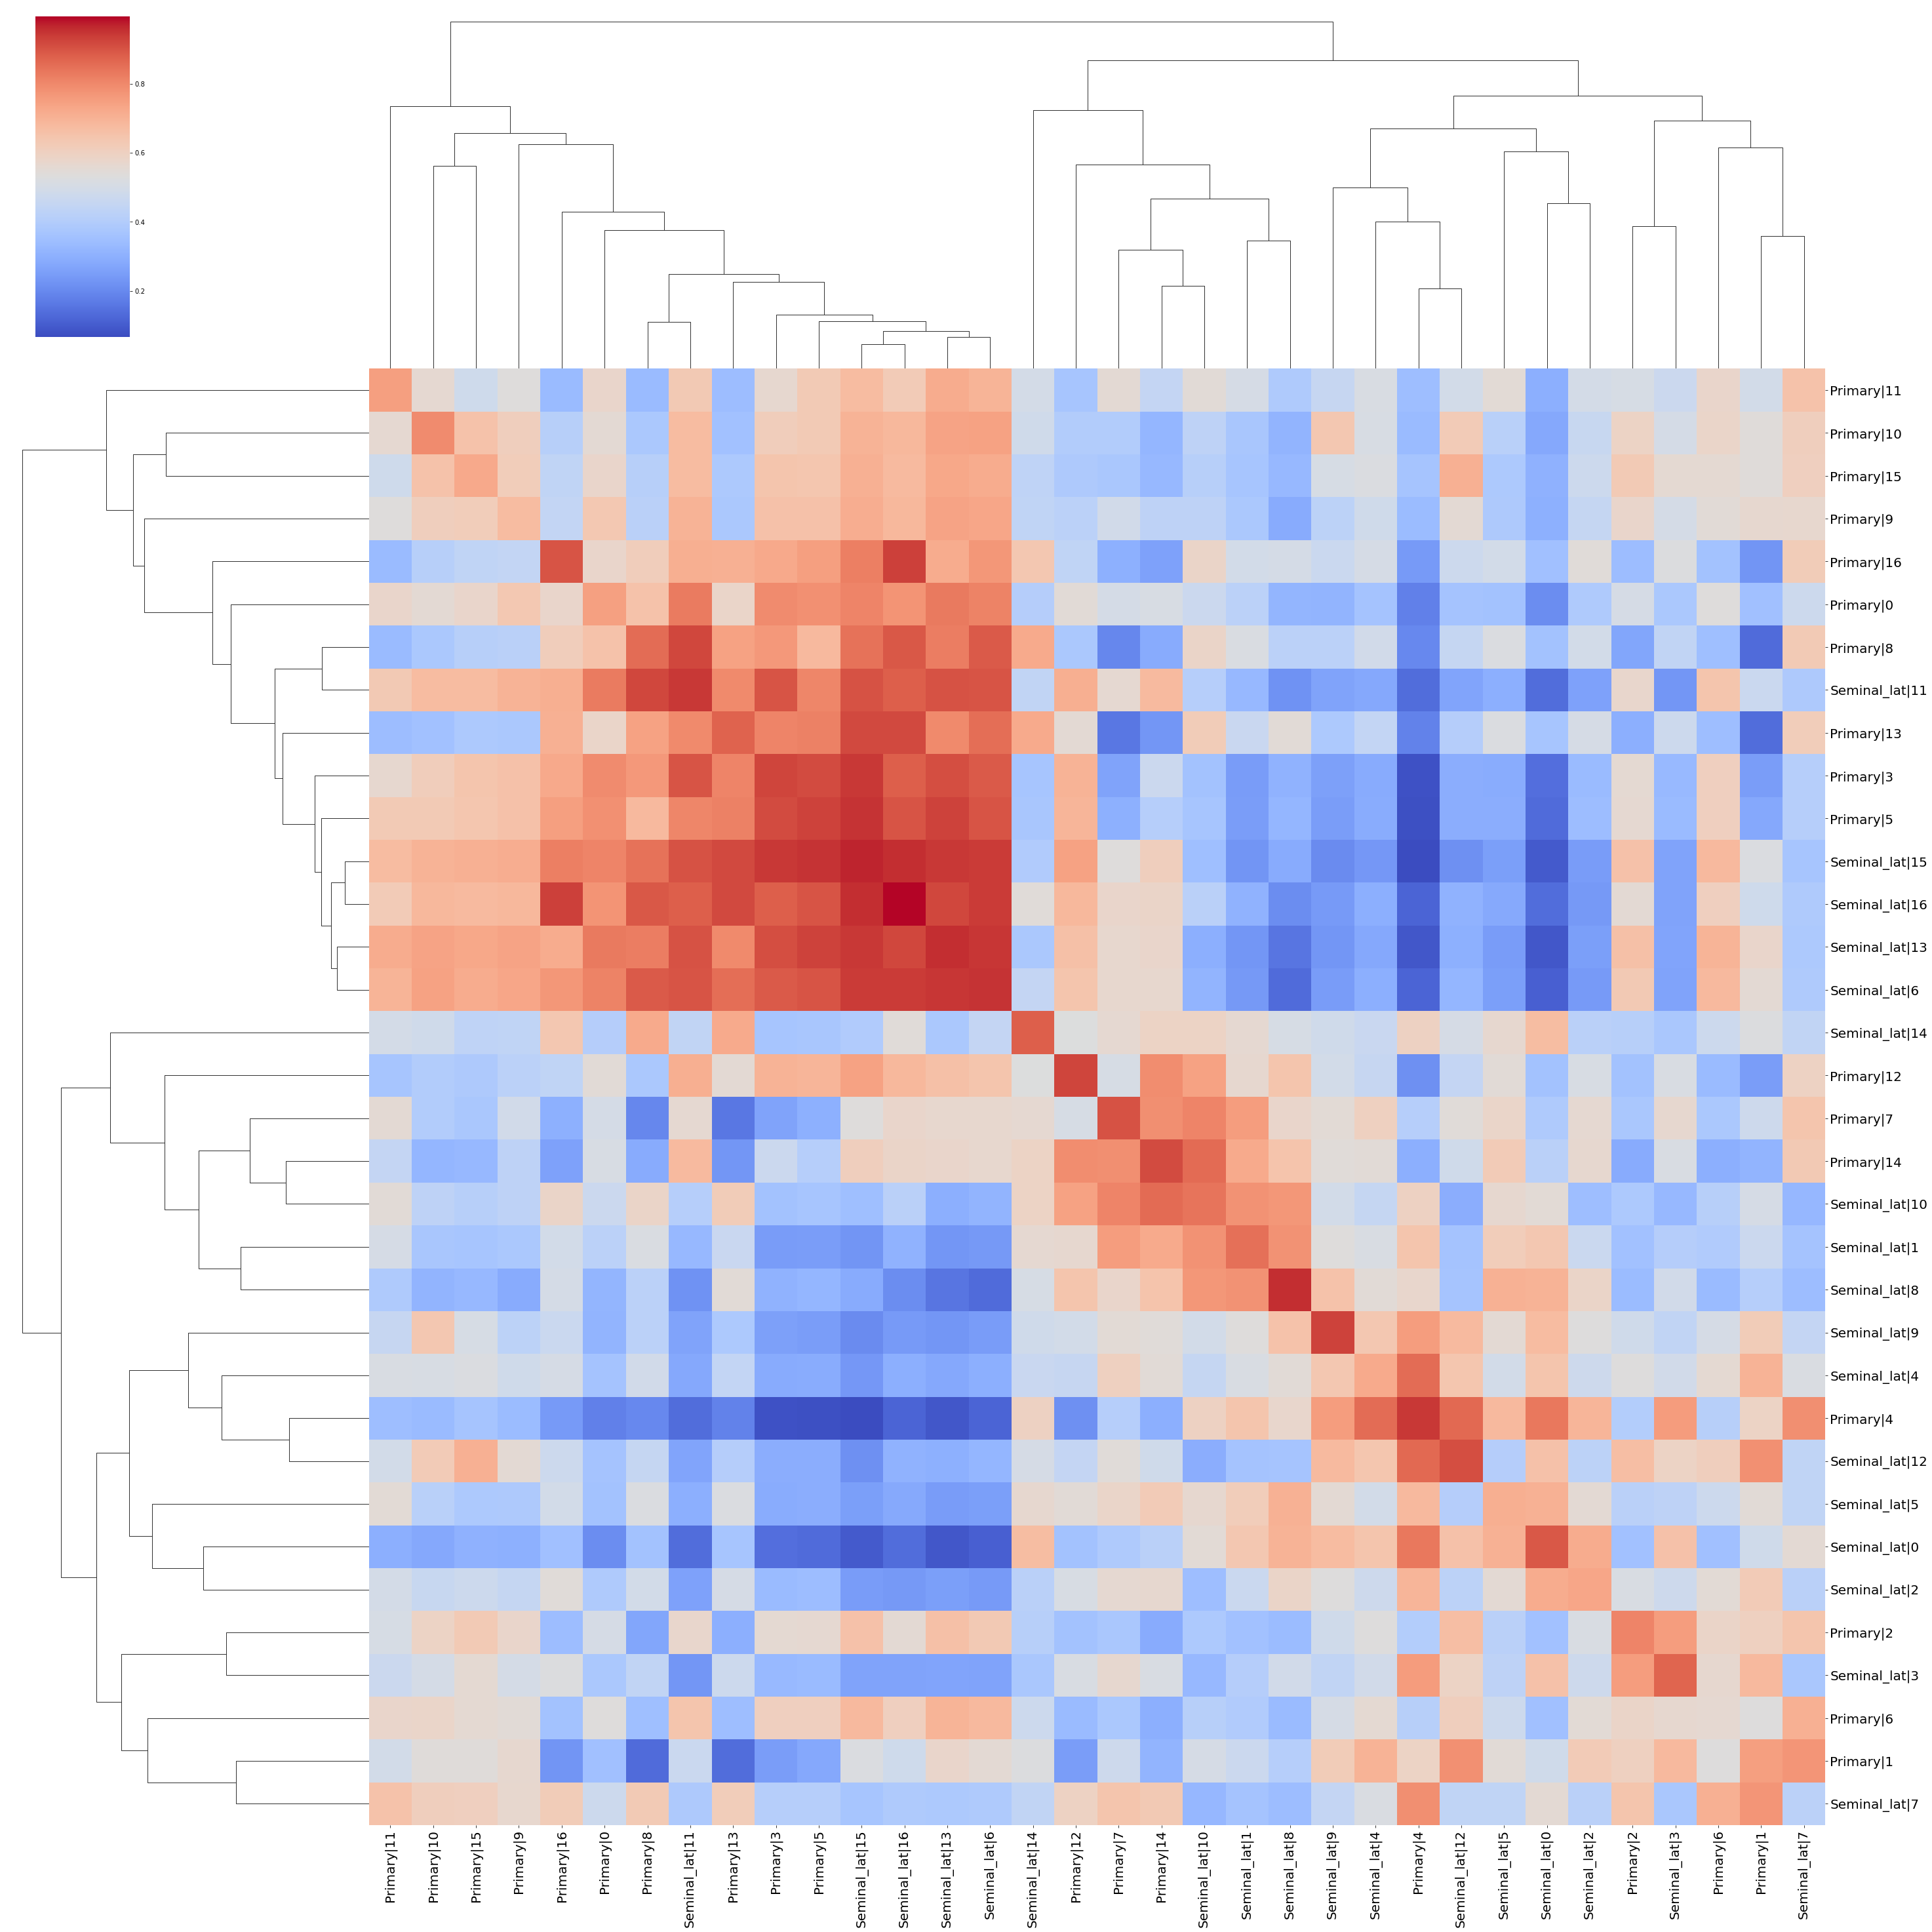

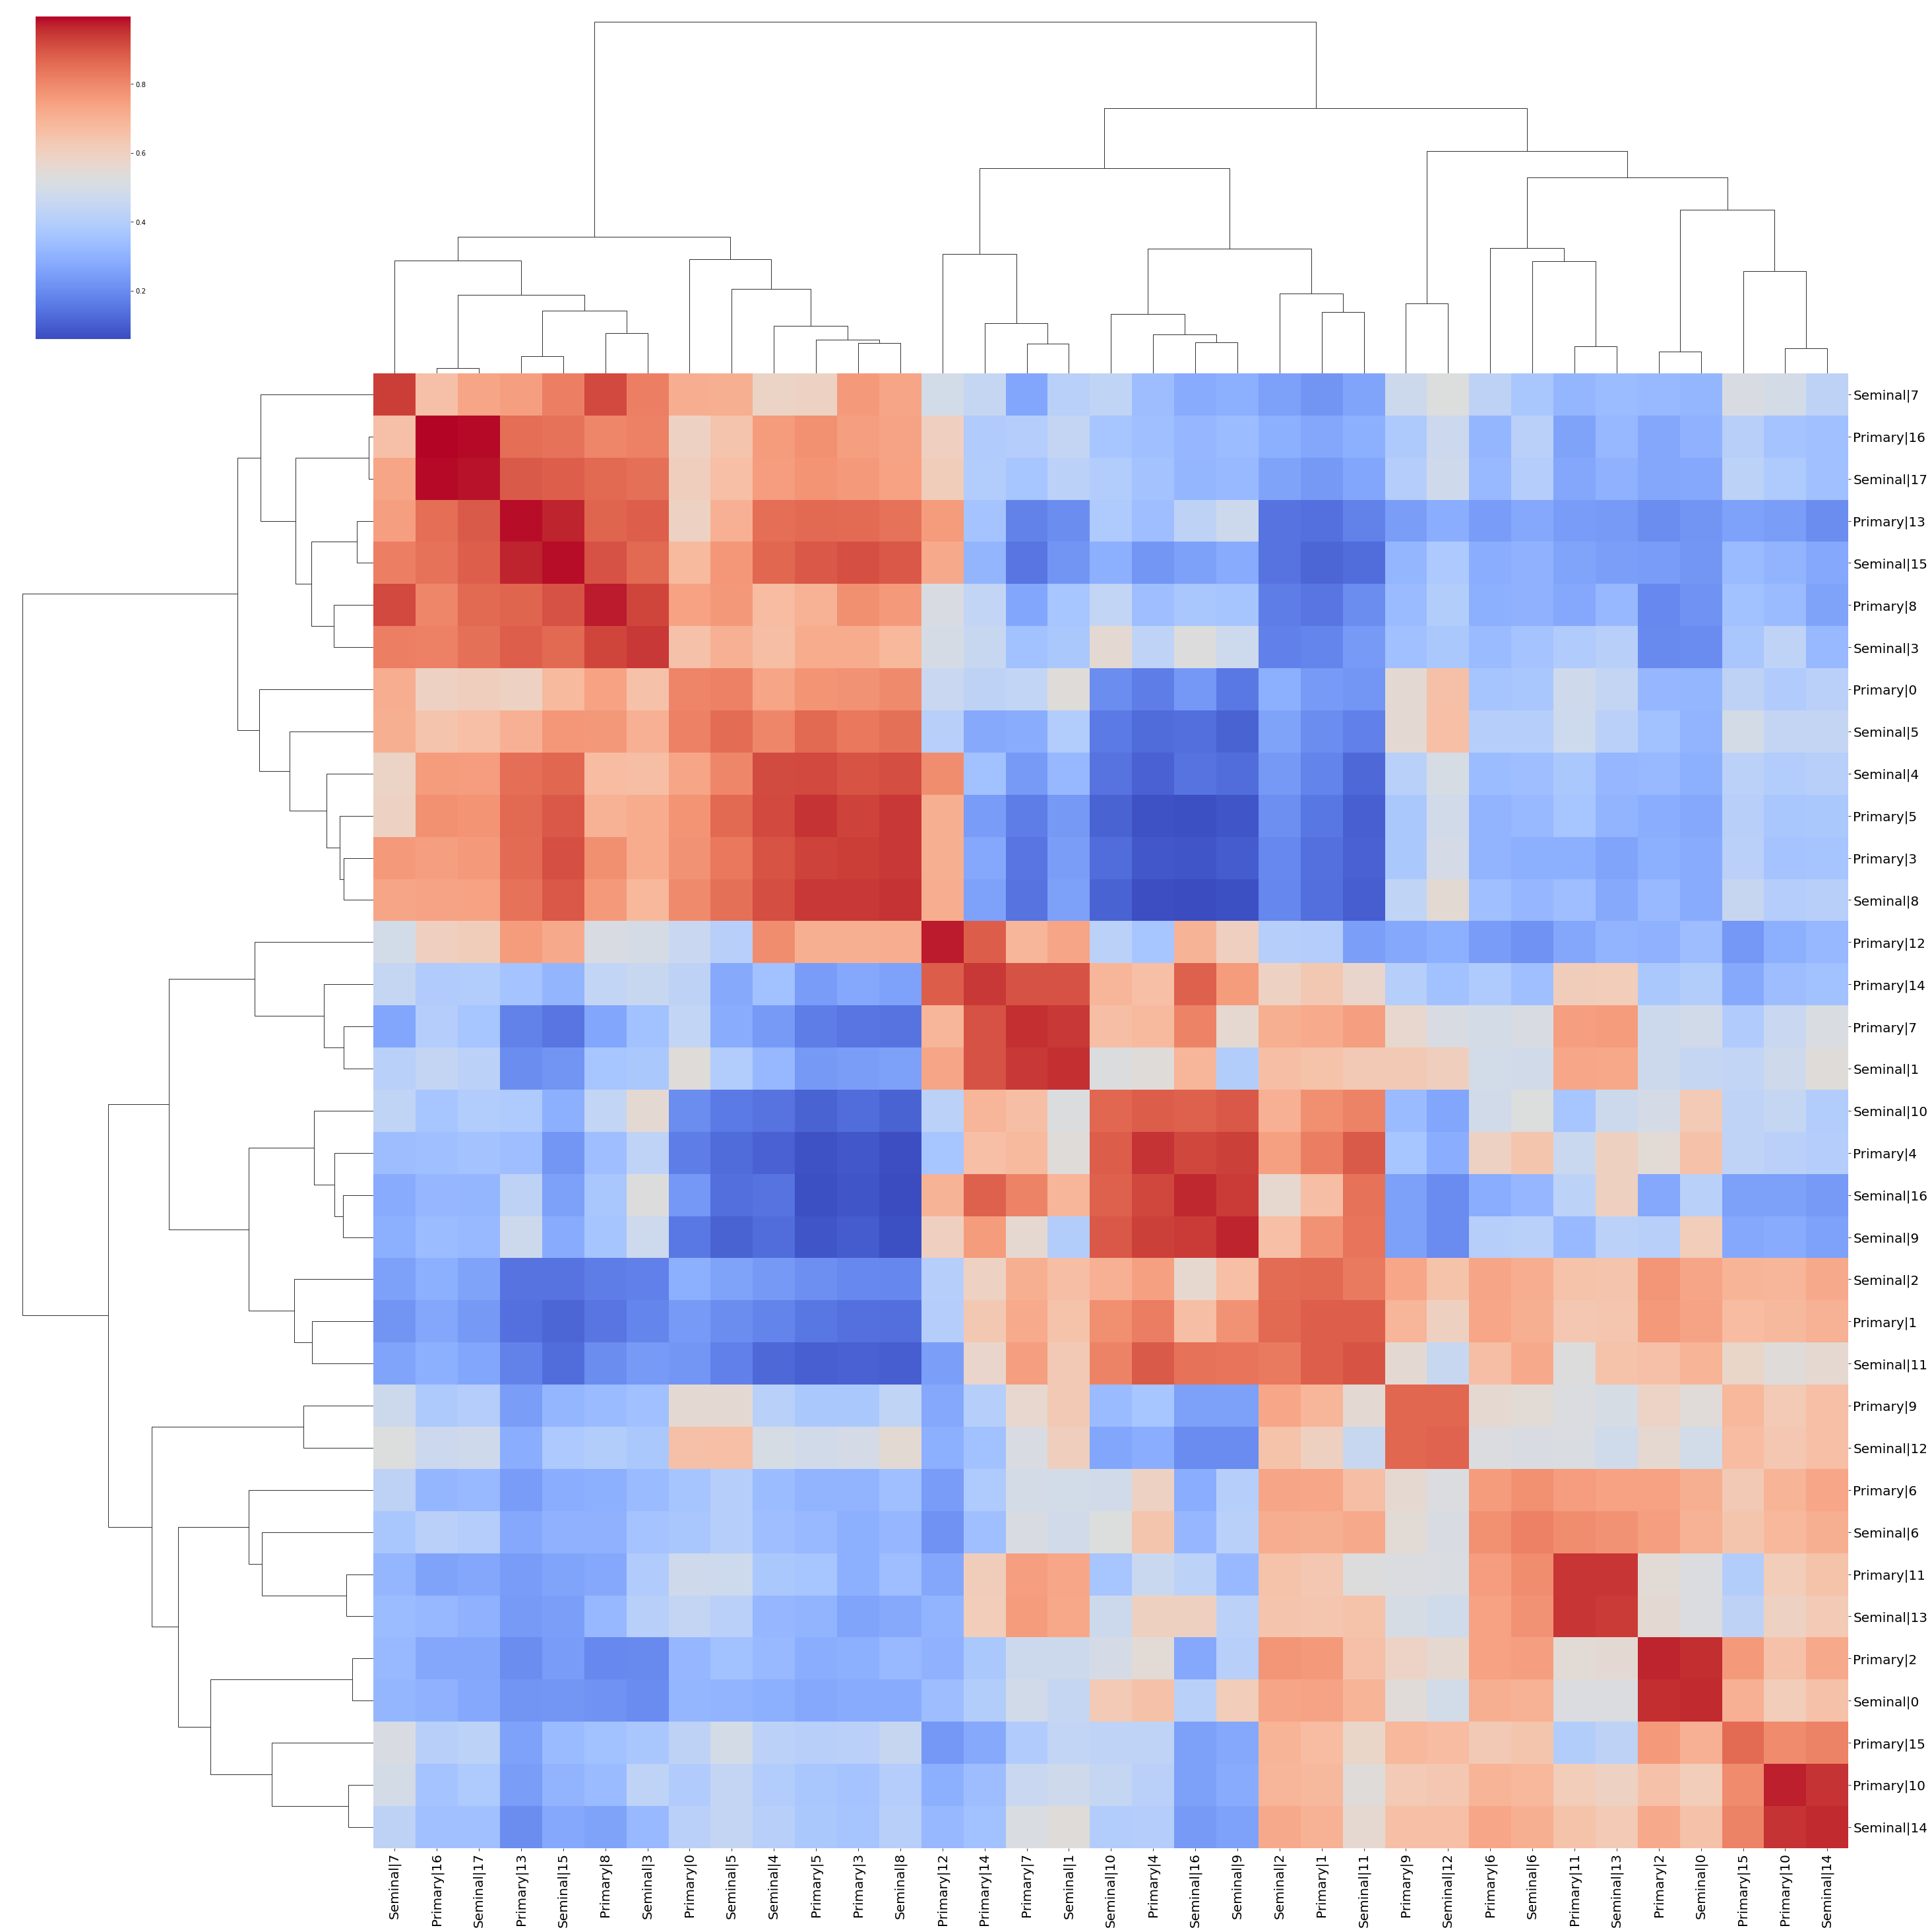

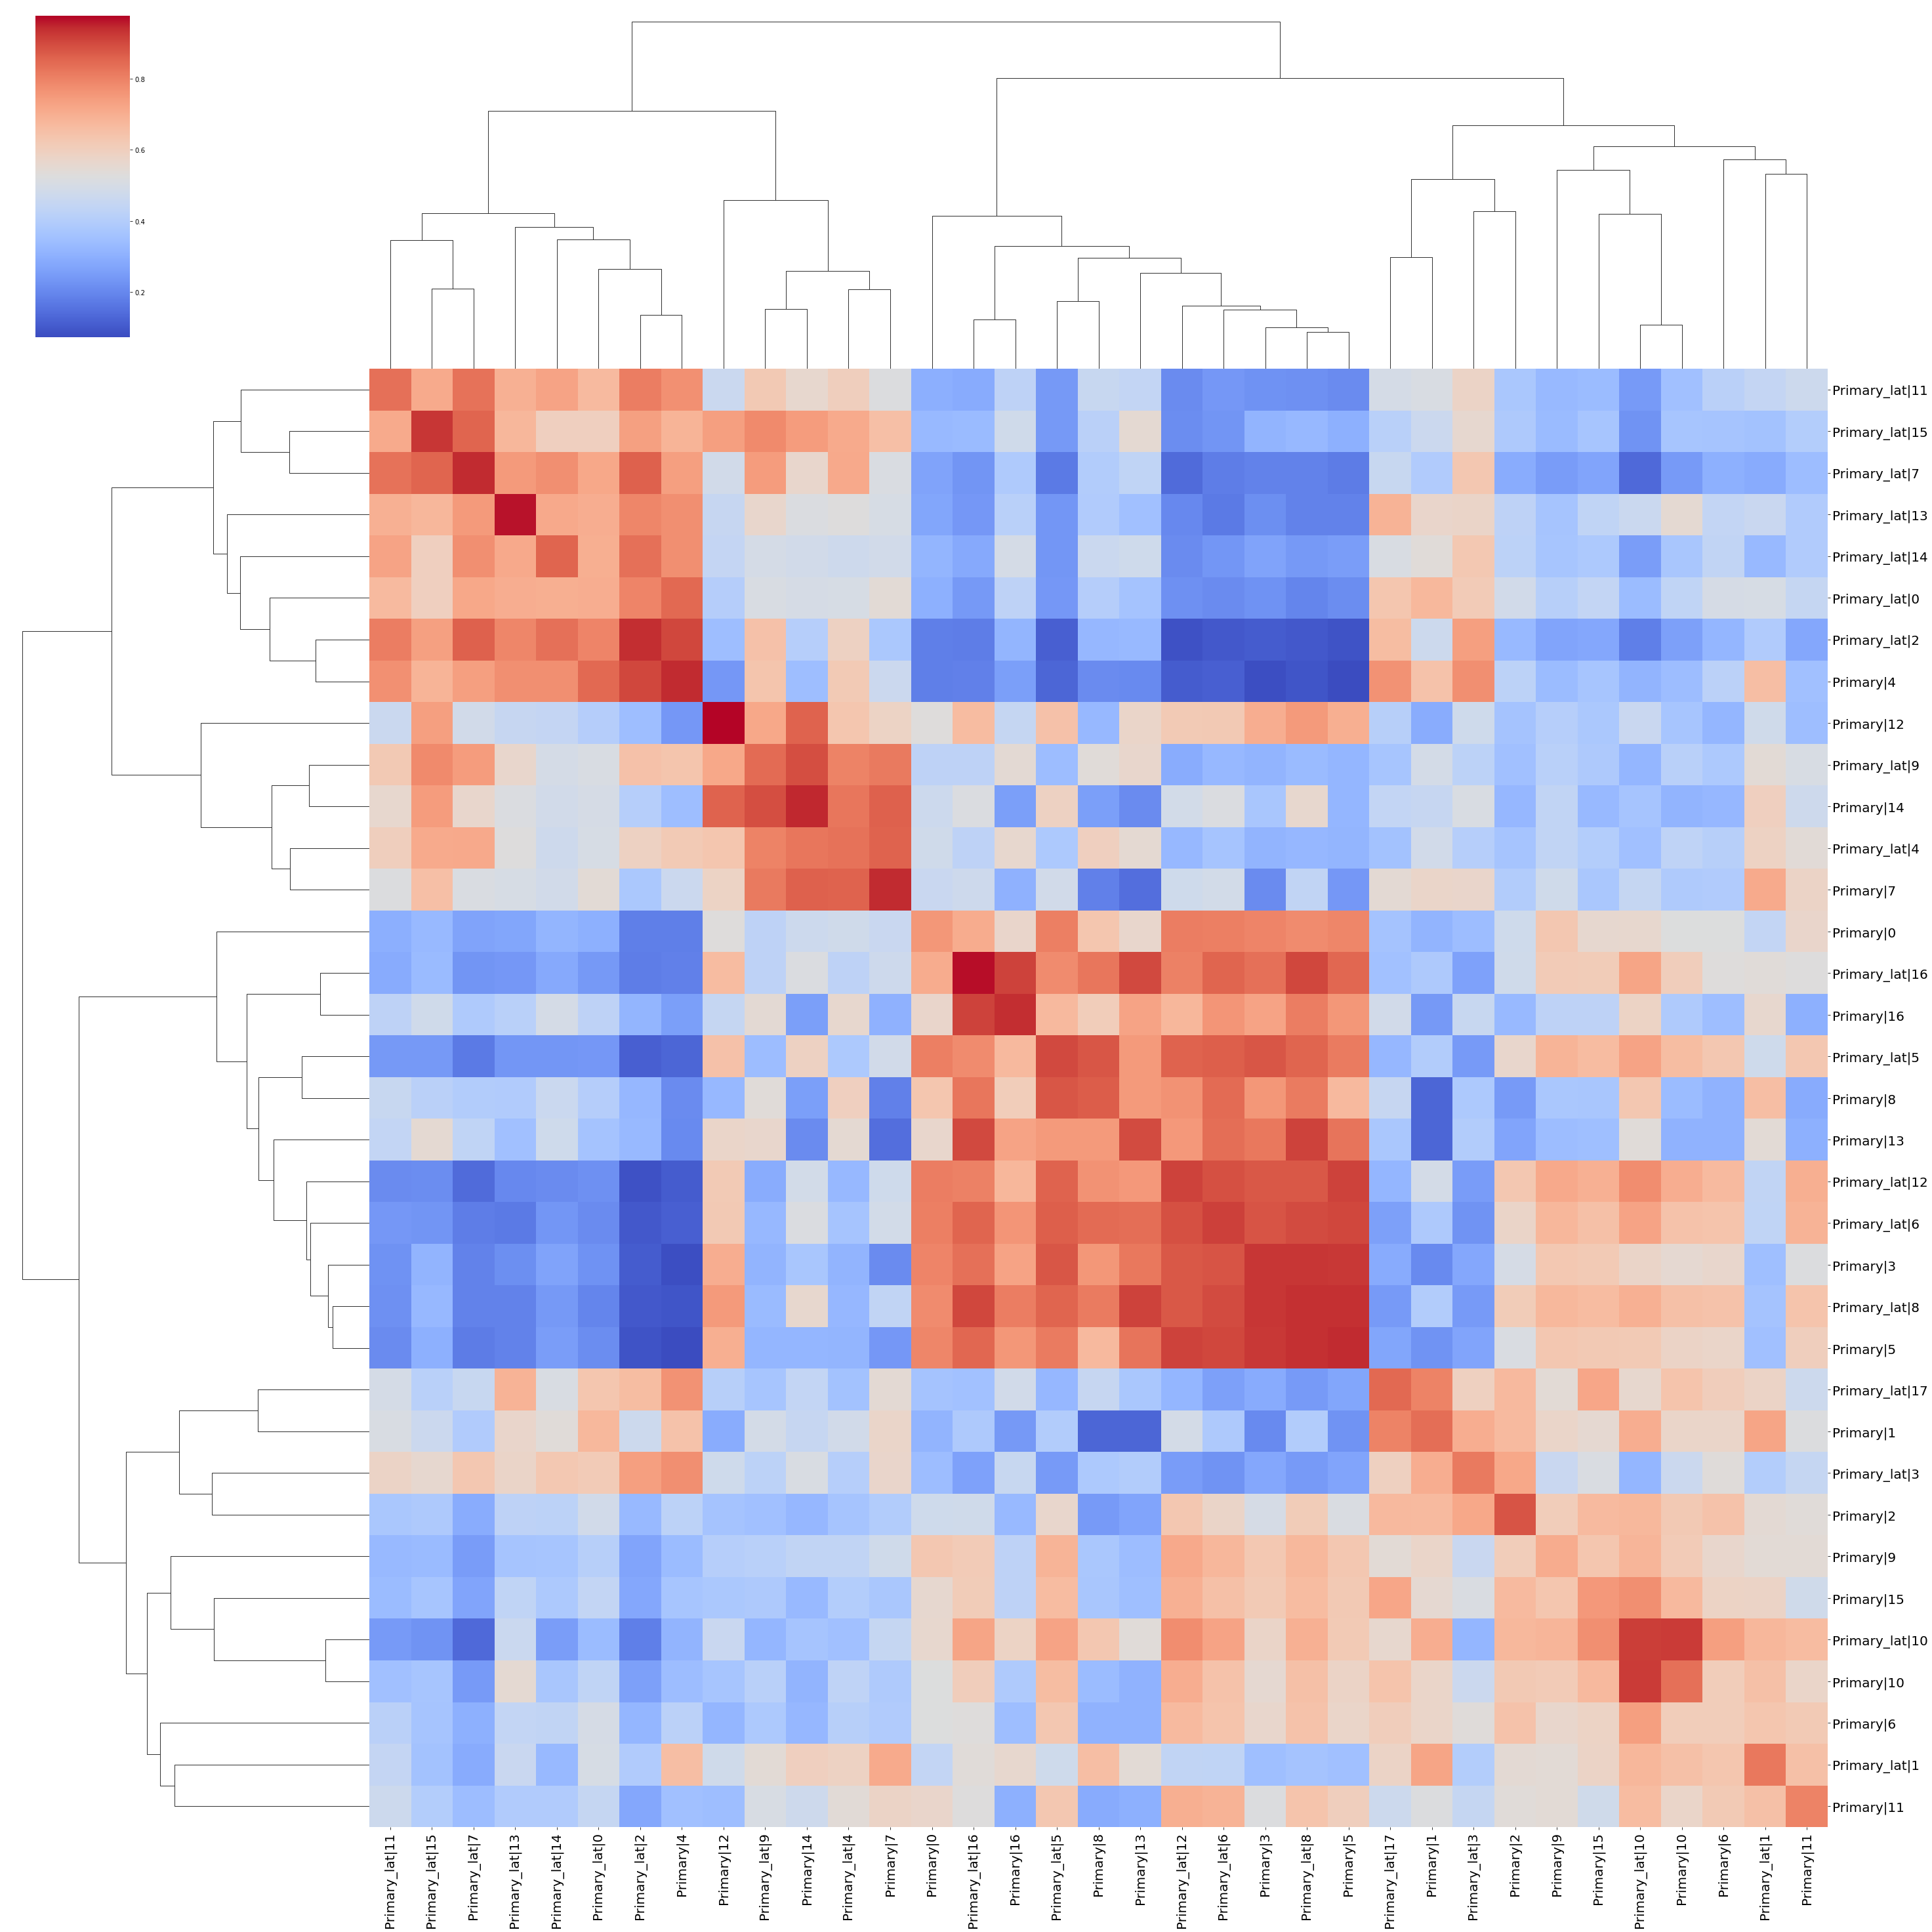

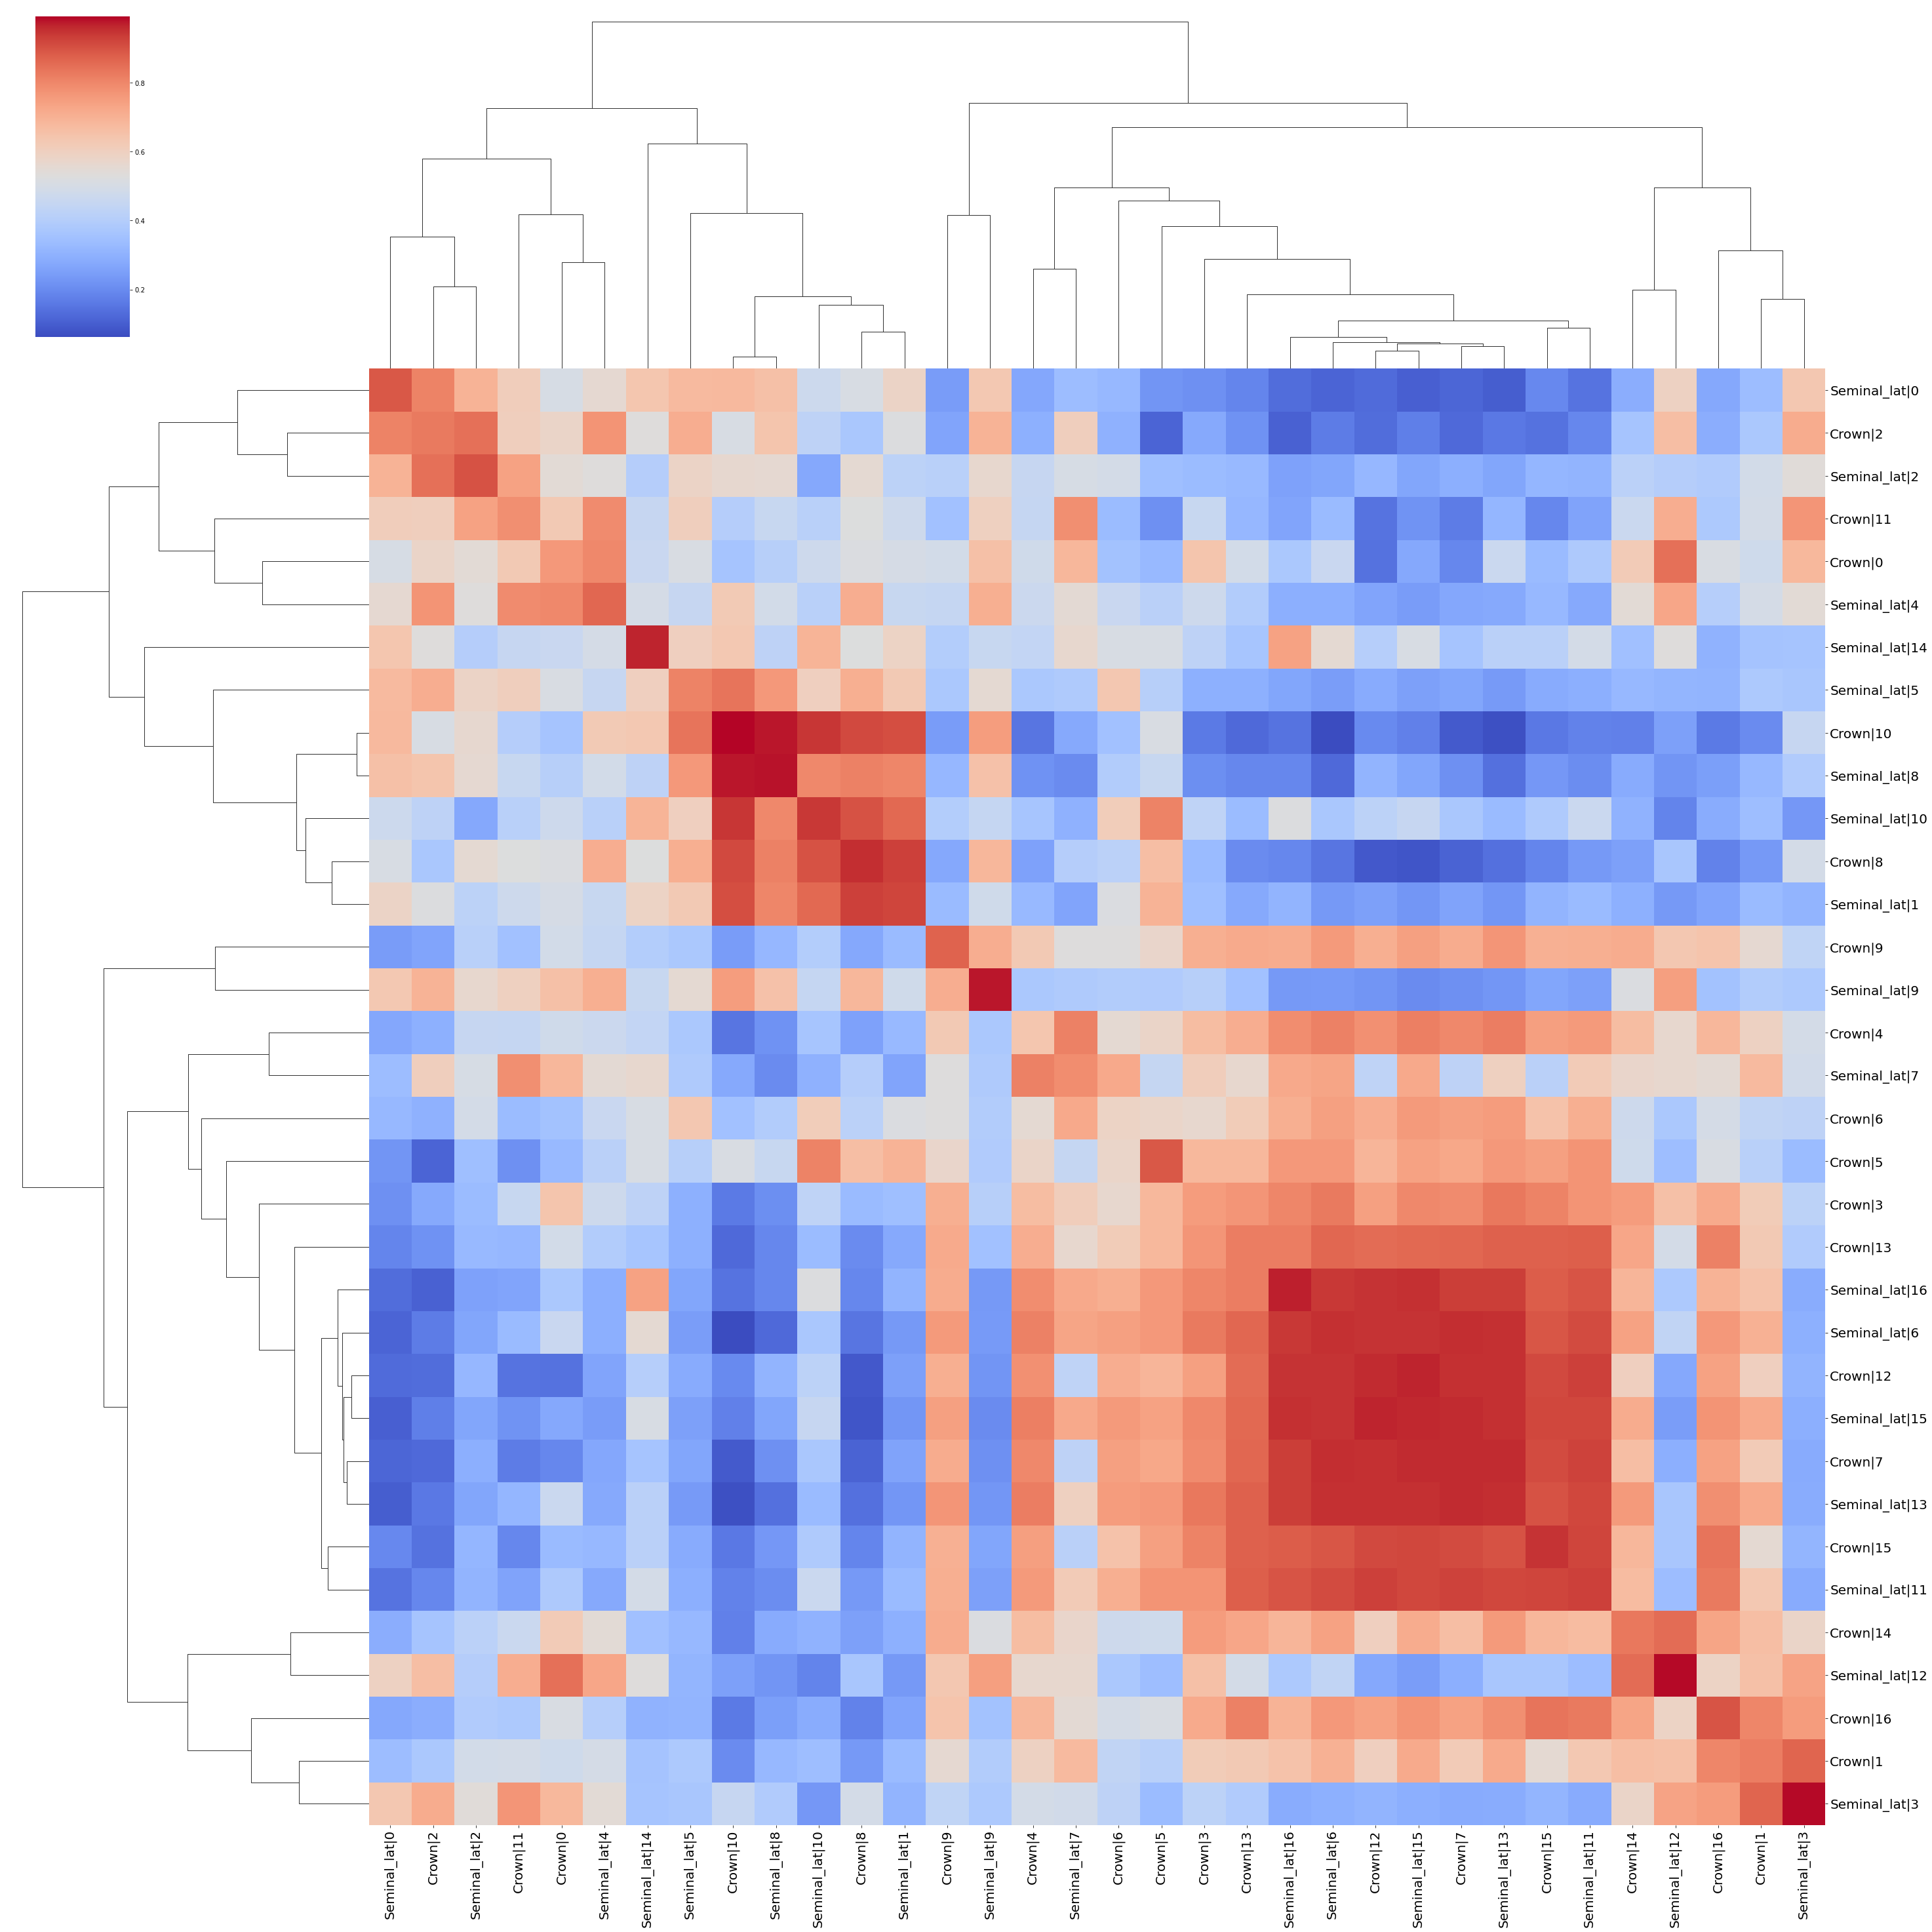

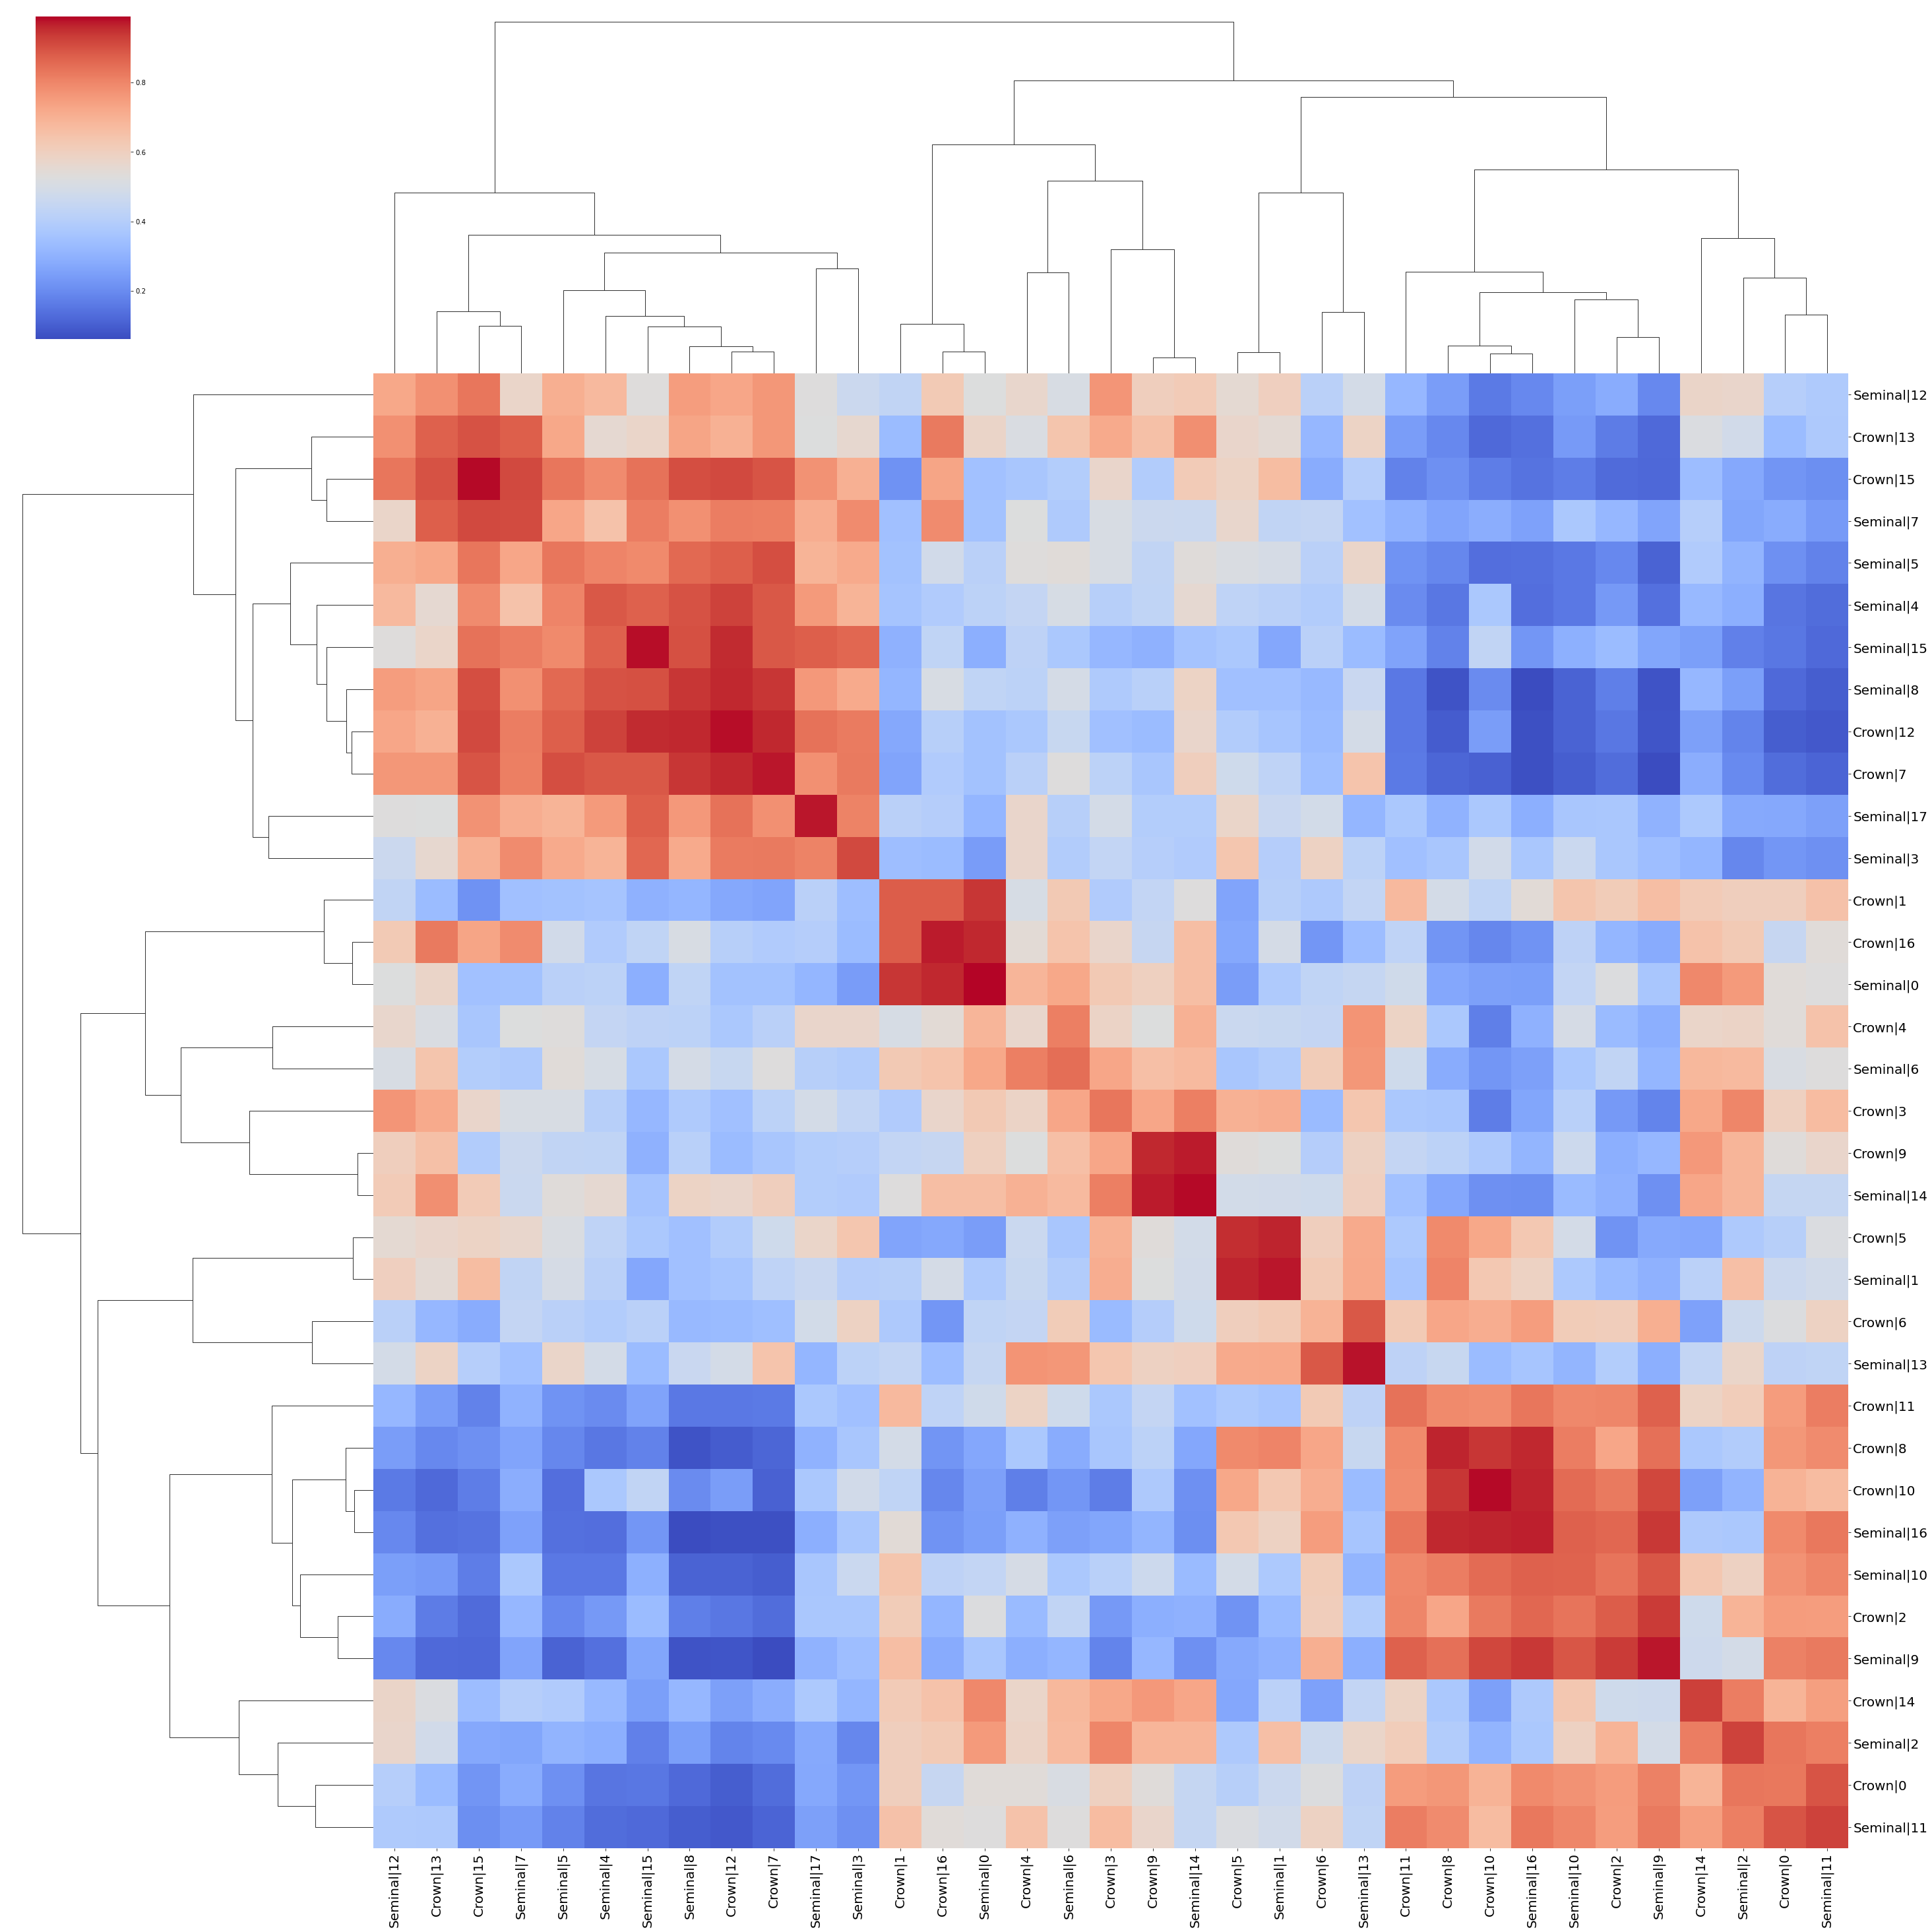

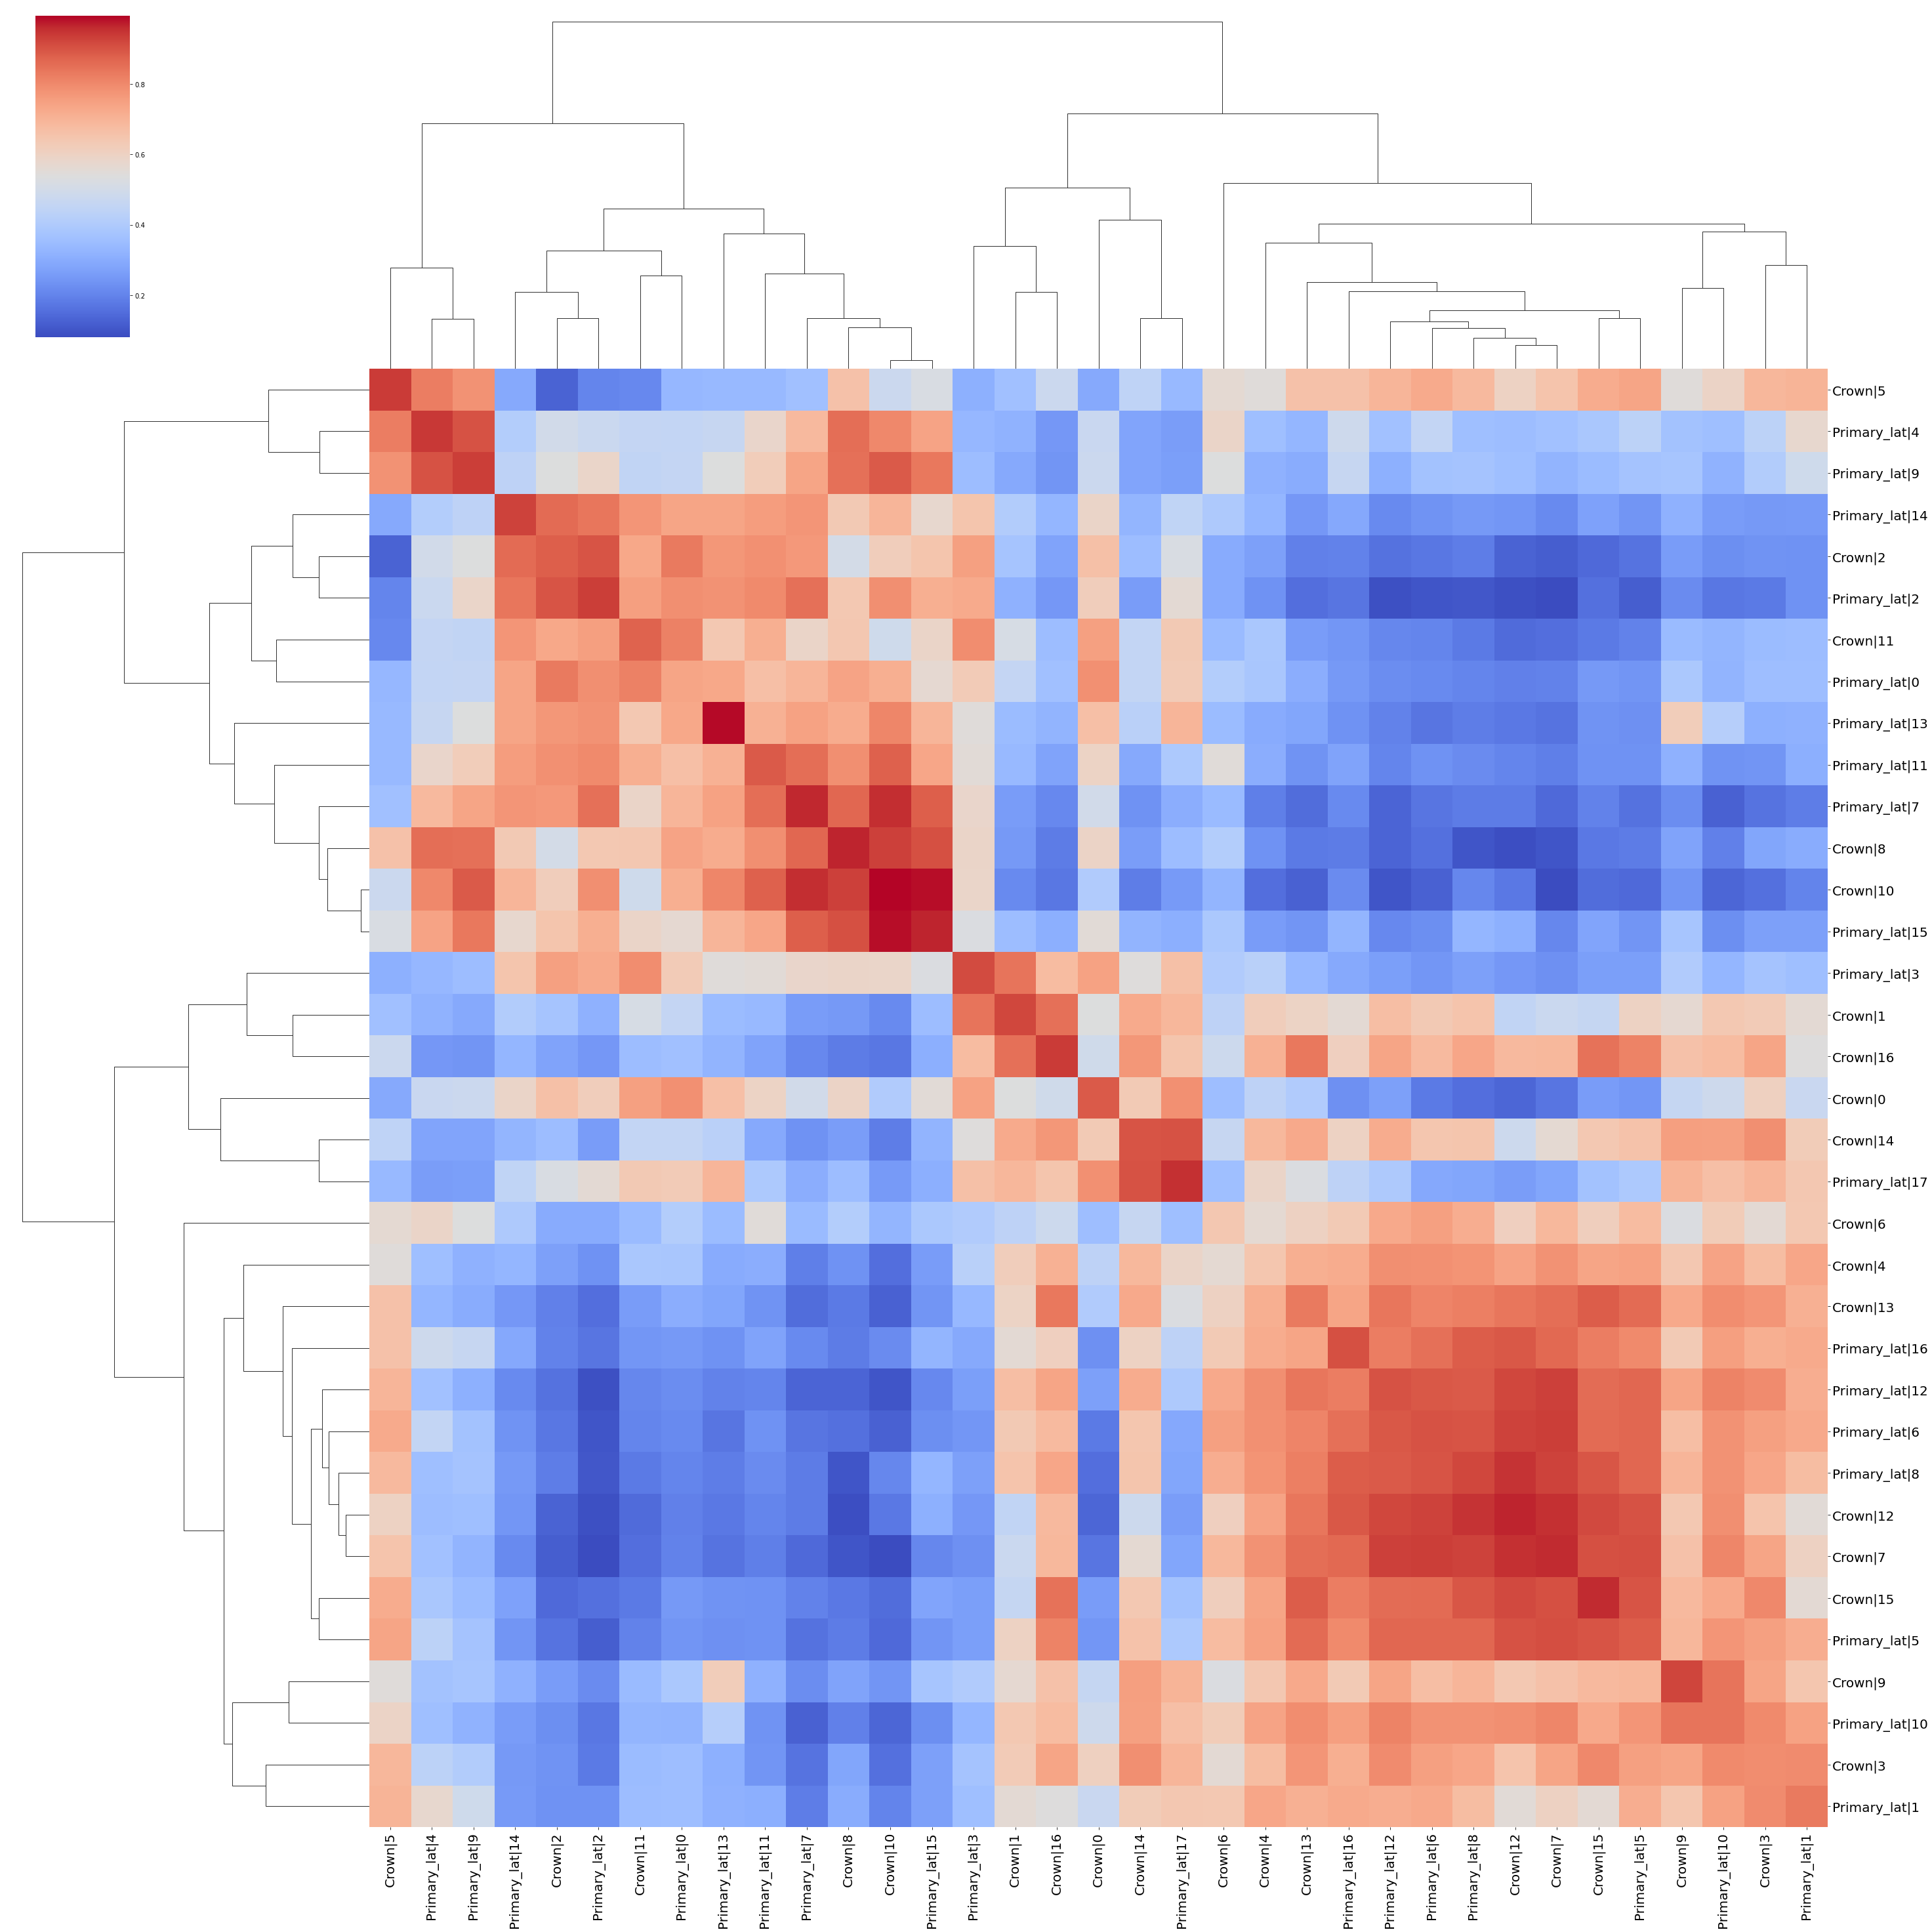

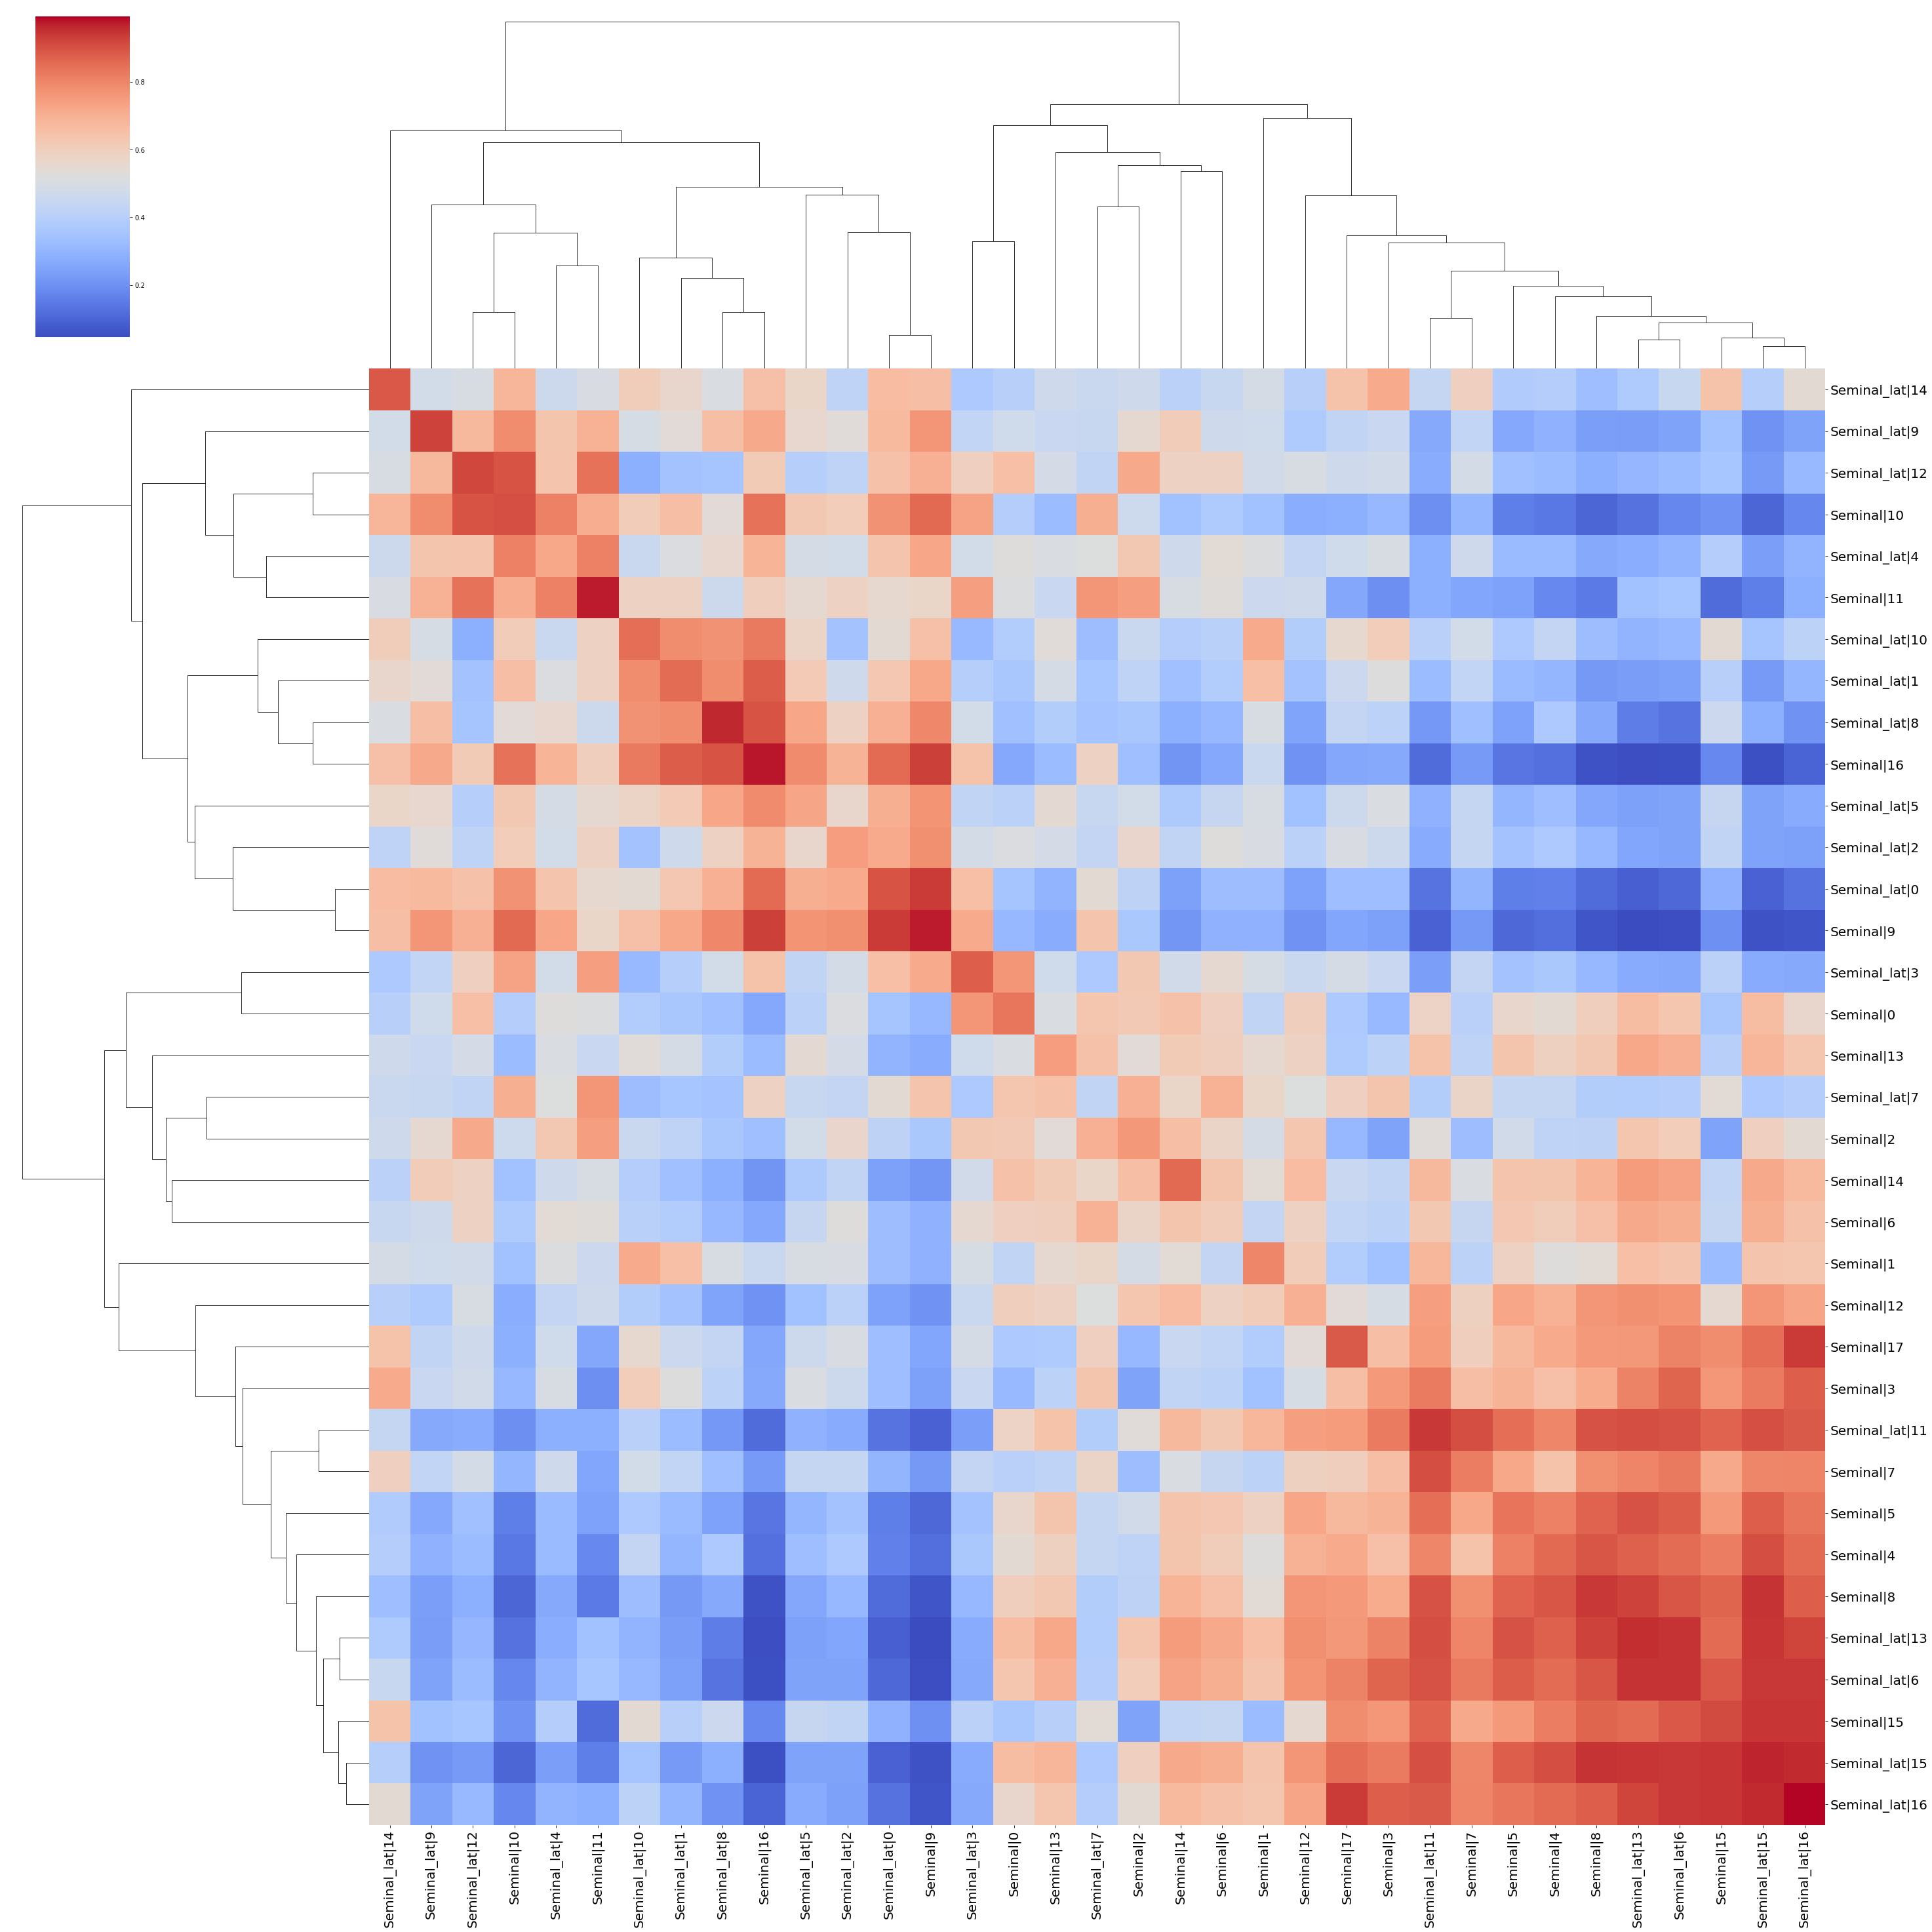

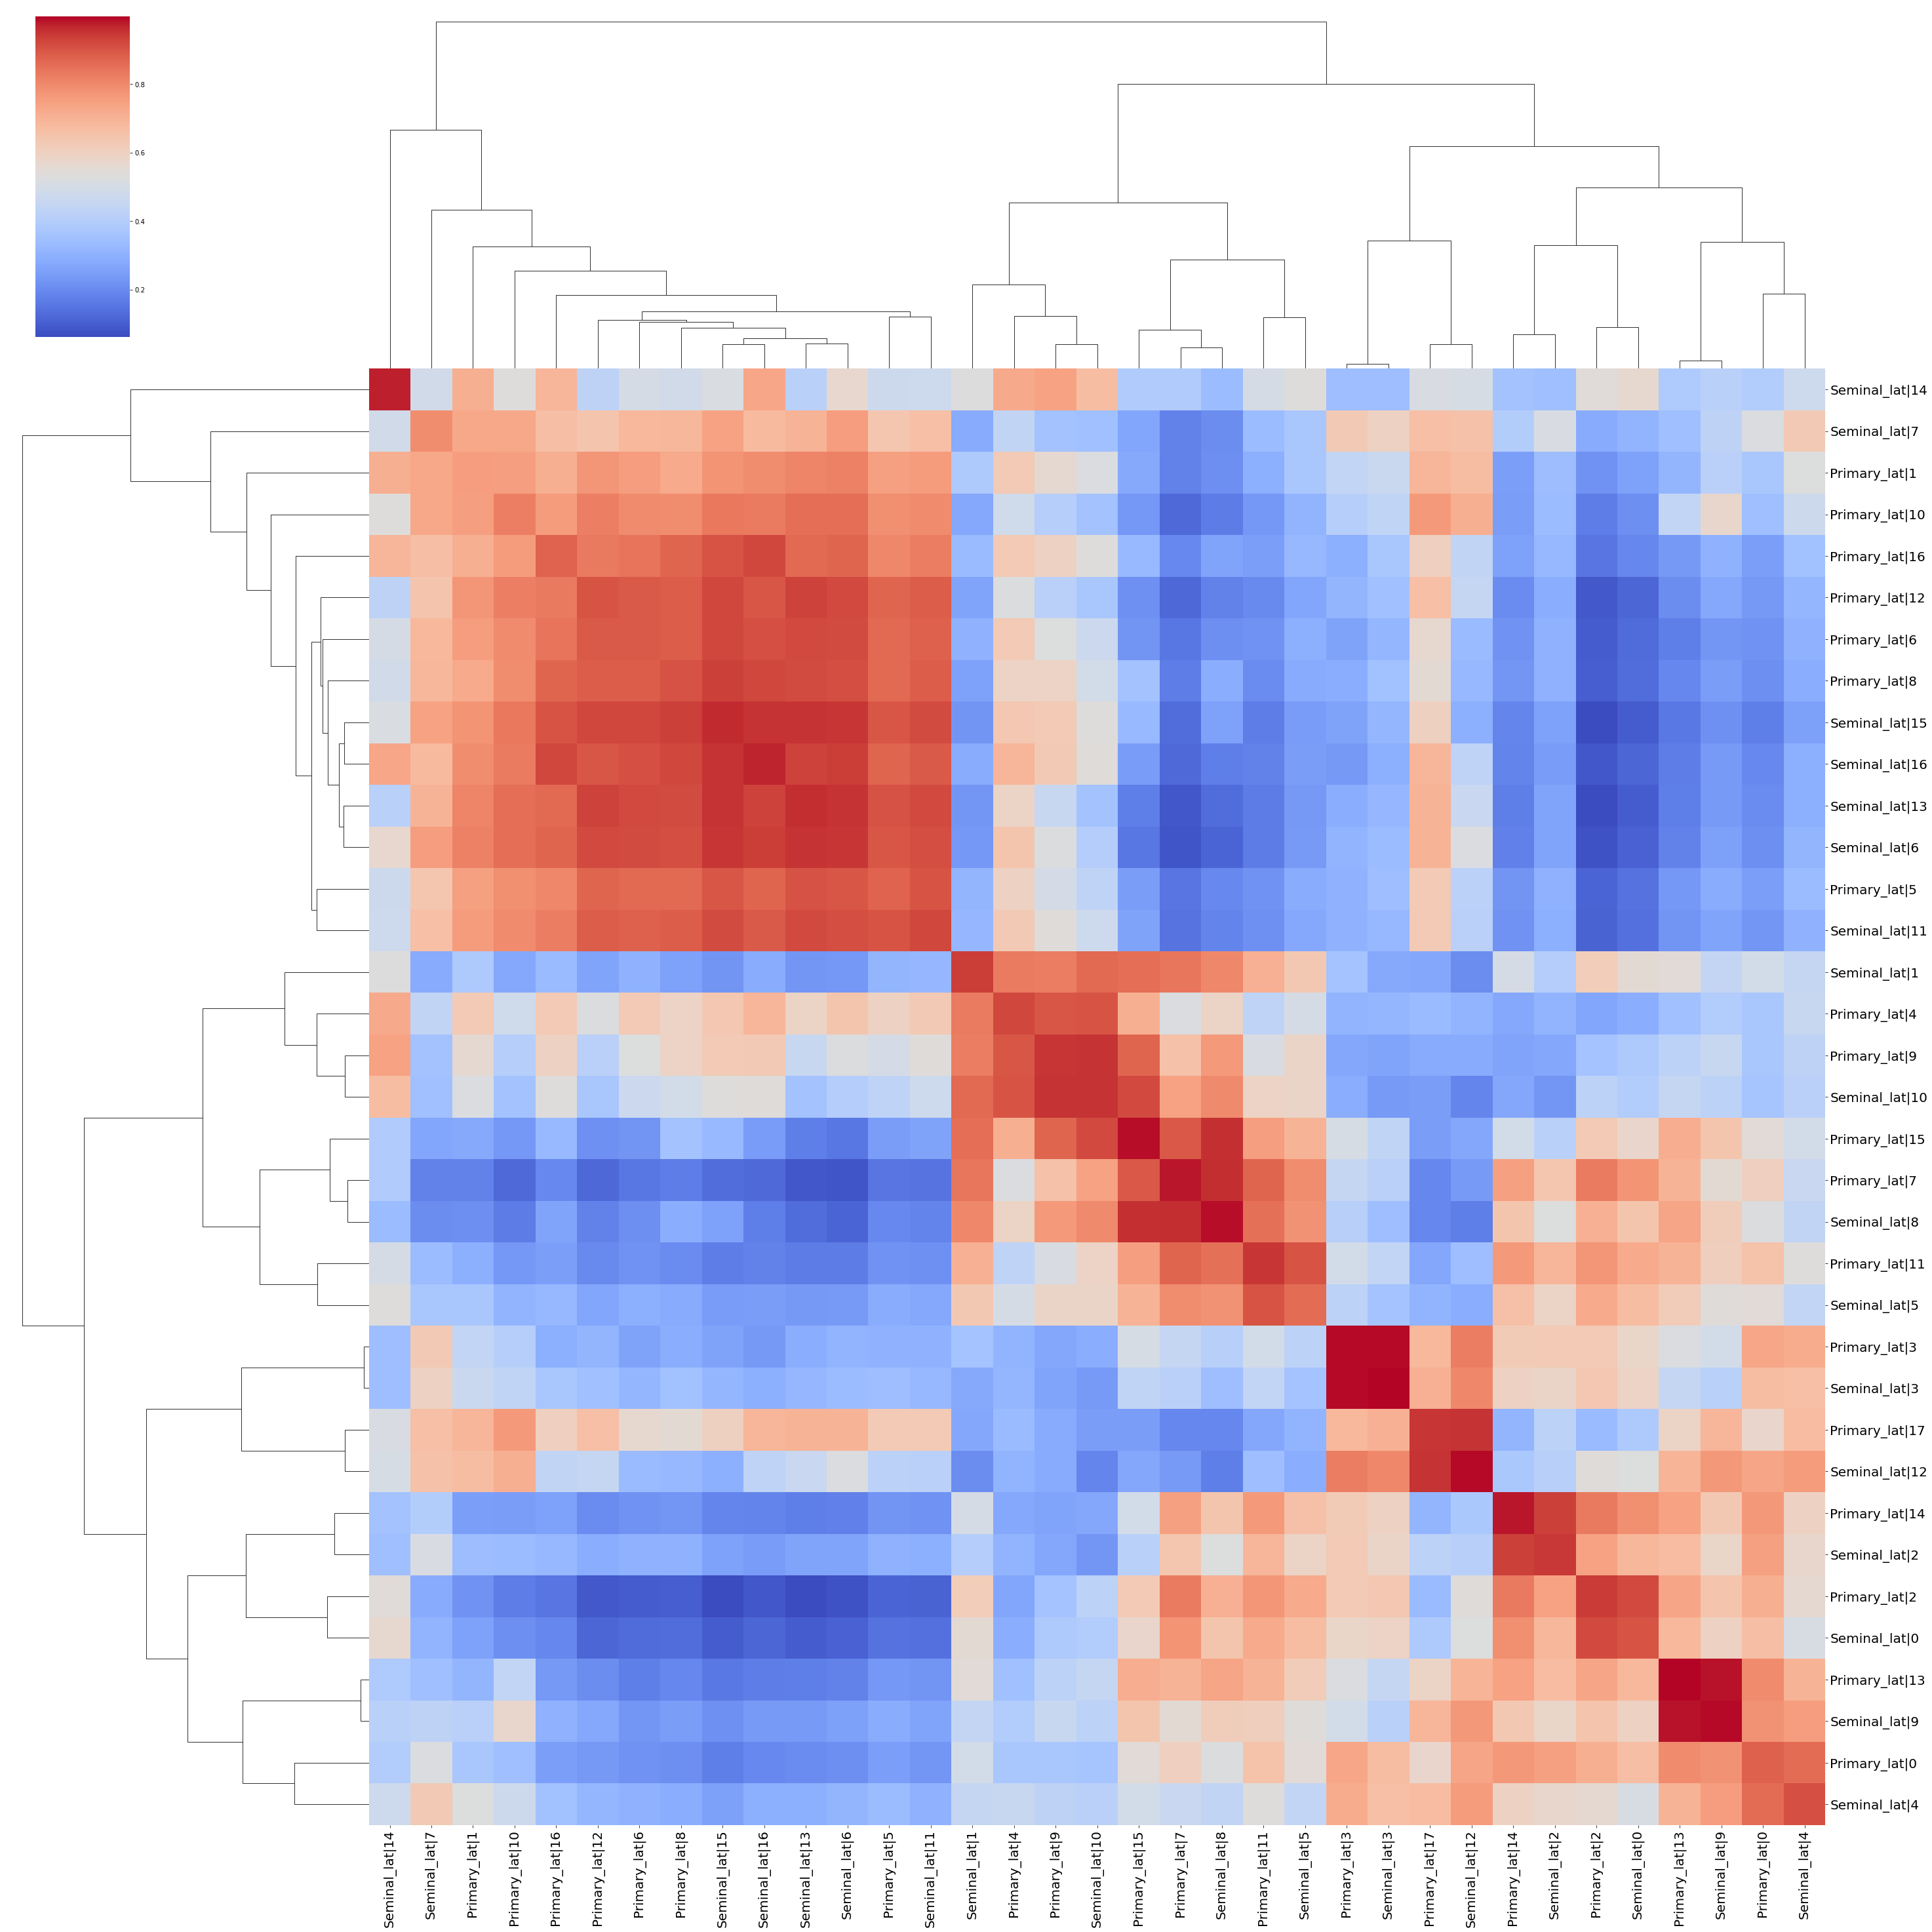

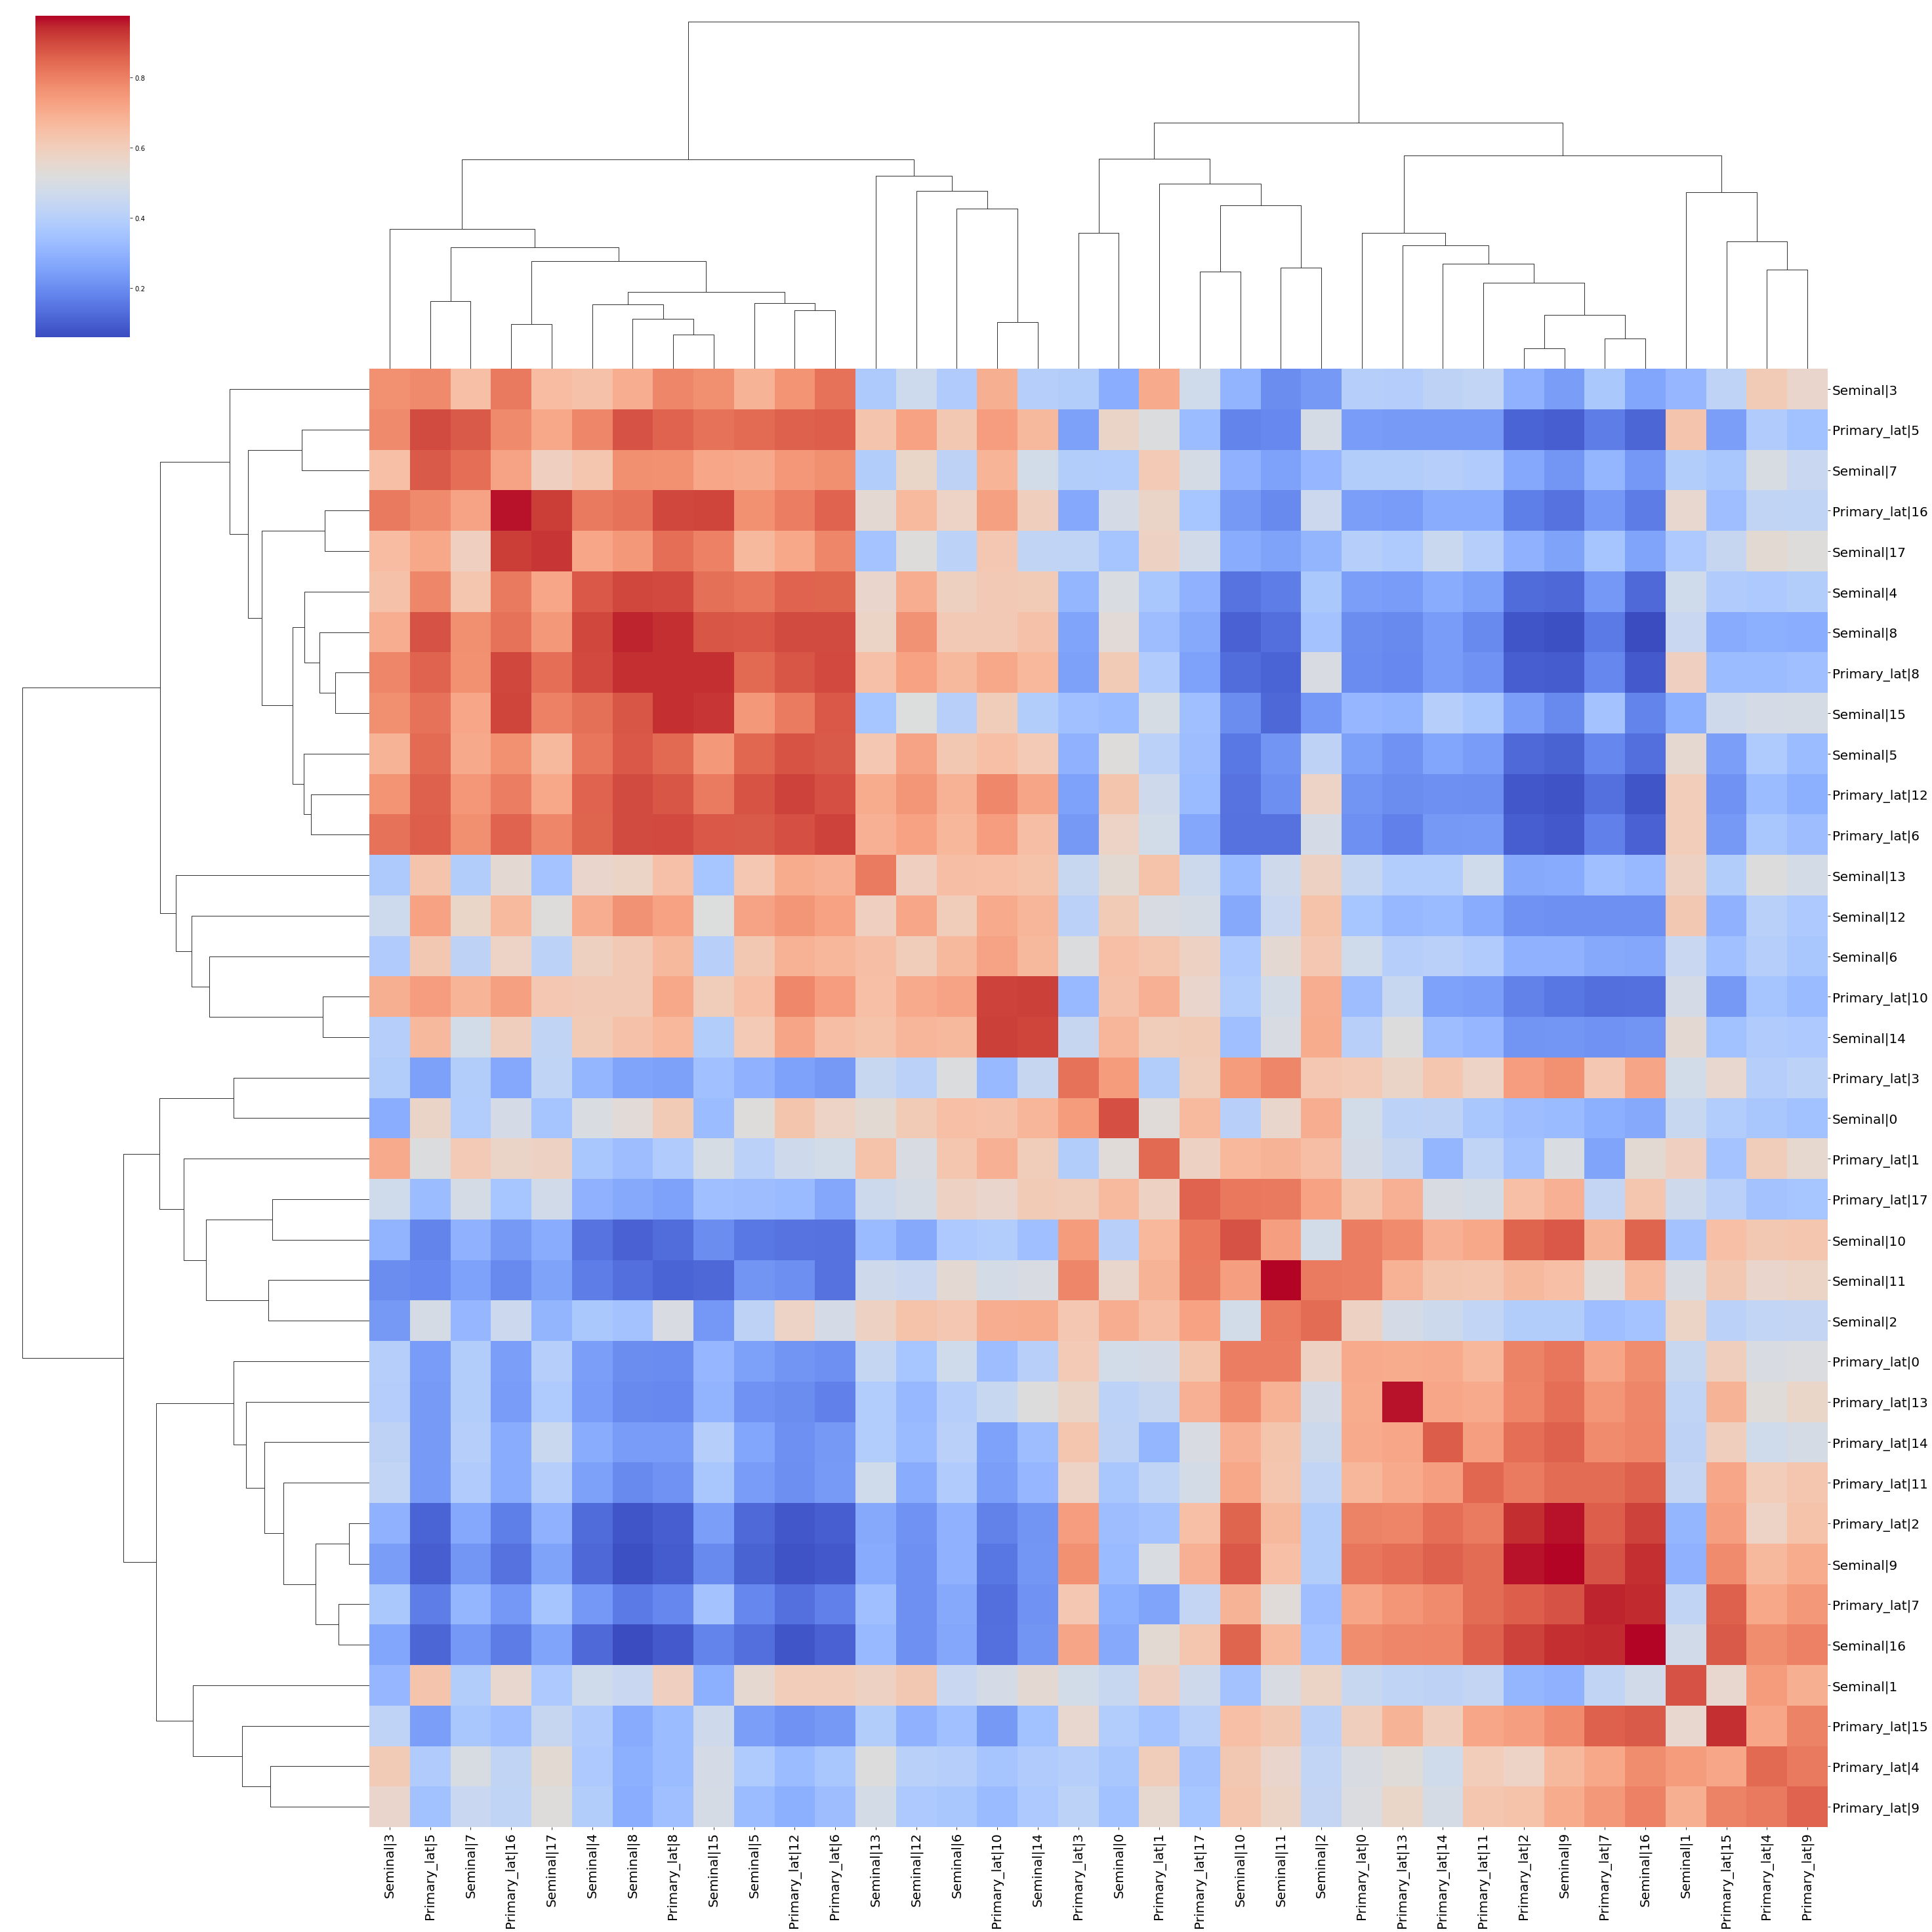

In [28]:
for combination in all_combos_of_sc_data:
    dataset_1_name = combination[0].obs["orig.ident"][0]
    dataset_2_name = combination[1].obs["orig.ident"][0]
    file_name = '/data/passala/Plots_for_projects/Sunil_Ken_root_shoot/Pairwise_combos/' + dataset_1_name + "_to_" + dataset_2_name + "_full_metaneighbor.pdf"
    subset_merge = ad.concat(combination,join="outer")
    subset_merge.obs["orig.ident"] = subset_merge.obs["orig.ident"].astype(str)
    pymn.variableGenes(subset_merge, study_col='orig.ident')
    pymn.MetaNeighborUS(subset_merge, study_col='orig.ident',
                        ct_col='seurat_clusters', fast_version=False, node_degree_normalization= True)
    g = pymn.plotMetaNeighborUS(subset_merge, cmap='coolwarm', figsize=(
        40, 40), fontsize=20, show=False, cbar_pos=(0.02, 0.82, 0.05, 0.17))

    for a in g.ax_row_dendrogram.collections:
        a.set_linewidth(1)

    for a in g.ax_col_dendrogram.collections:
        a.set_linewidth(1)
    g.savefig(file_name)
